# Tabla de contenidos

* [Objetivo](#Objetivo)
* [Importación de librerías](#Importación-de-librerías)
* [Carga de los datos](#Carga-de-los-datos)
* [Exploración de los datos](#Exploración-de-los-datos)
	* [Conclusión del análisis exploratorio](#Conclusión-del-análisis-exploratorio)
* [Depuración de los datos](#Depuración-de-los-datos)
	* [Fase I: Detección de outliers](#Fase-I:-Detección-de-outliers)
	* [Fase II: Detección datos perdidos](#Fase-II:-Detección-datos-perdidos)
		* [Tratamiento de valores perdidos - eliminación](#Tratamiento-de-valores-perdidos---eliminación)
		* [Tratamiento de valores perdidos - imputación](#Tratamiento-de-valores-perdidos---imputación)
			* [Variables cuantitativas con datos perdidos.](#Variables-cuantitativas-con-datos-perdidos.)
			* [Variables categóricas con datos perdidos.](#Variables-categóricas-con-datos-perdidos.)
		* [Imputación por el vecino más cercano](#Imputación-por-el-vecino-más-cercano)
* [Transformación de los datos](#Transformación-de-los-datos)
* [Selección de características](#Selección-de-características)
* [Conjunto test](#Conjunto-test)
	* [Carga del conjunto de datos](#Carga-del-conjunto-de-datos)
	* [Exploración de los datos](#Exploración-de-los-datos)
	* [Depuración de los datos](#Depuración-de-los-datos)
	* [Transformación de los datos](#Transformación-de-los-datos)
	* [Selección de características](#Selección-de-características)
* [APRENDIZAJE NO SUPERVISADO](#APRENDIZAJE-NO-SUPERVISADO)
	* [Asociación](#Asociación)
	* [Clustering](#Clustering)
* [Conclusiones](#Conclusiones)
* [APRENDIZAJE SUPERVISADO](#APRENDIZAJE-SUPERVISADO)
	* [Clasificador bayesiano](#Clasificador-bayesiano)
	* [Clasificador Árboles de decisión](#Clasificador-Árboles-de-decisión)
	* [Clasificador $k$-NN](#Clasificador-$k$-NN)
	* [Clasificador Perceptrón Multicapa](#Clasificador-Perceptrón-Multicapa)
	* [Autoencoder](#Autoencoder)
* [Conclusiones](#Conclusiones)


<h1 style="color:#dd6d10"><center> ANALÍTICA DE BIG DATA <br> <br> Cuaderno de trabajo - Evaluación</h1></center>

Este cuaderno ofrece la aplicación de distintas técnicas de aprendizaje automático para realizar predicciones sobre la conocida base de datos *titanic*. Para más información sobre este conjunto de datos se puede consultar *Report on the Loss of the 'Titanic' (S.S.) (1990), British Board of Trade Inquiry Report\_(reprint), Gloucester, UK: Allan Sutton Publishing*.

Se llevará a cabo un análisis del conjunto de datos, así como la predicción de la variable explicada.

La variable explicada o dependiente (atributo *survived*) indica si la persona sobrevivió o no al hundimiento del Titacnic. El objetivo es encontrar alguna relación entre los atributos (variables independientes) y la probabilidad de que un pasajero sobreviva o no al naufragio (variable dependiente). Por ejemplo, supervivencia por edad, sexo, clase, etc.

# Objetivo

Predecir, con las técnicas de aprendizaje automático, si un pasajero sobrevive o no al hundimiento del Titanic. Es decir, dado unos valores de los atributos para un cierto pasajero, los modelos deben predecir el valor 0 o 1 para la variable *survived*.

# Importación de librerías

In [150]:
import sys
try:
    import tensorflow as tf
    print(f"✅ ÉXITO: TensorFlow {tf.__version__} instalado en Python {sys.version}")
except ImportError:
    print("❌ Aún no detecto TensorFlow")

KeyboardInterrupt: 

**<Center>Librerias Necesarias</Center>**

**Librerias de manipulación y análisis matemático**

**Pandas:** Herramienta usada para la carga del dataset y manejo como panel de datos estructurado  
**Numpy y Math:** Uasada para operaciones matriciales eficientes y cálculos matemáticos avanzados que requieren los algoritmos.  
**Scipy (Stats):** Para análisis estadisticos más profundos.

**Librerias para visualización**

**Matplotlib y Seaborn:** Para generar gráfricos estadísticos que nos permitirán entender la distribución de los datos y relaciones entre variables.  
**Missingno:** Librería especializada muy útil para visualizar gráficamente dónde están los huecos de información (valores nulos)

**Preprocesamiento y Transformación**

**Sklearn Preprocessing (StandardScales, MinMaxScales, Encoders):** Normalizar datos numéricos (ponerlos en la misma escala) y traducir las variables categóricas (texto) a números que los algoritmos puedan entender.  

**Modelado y Algoritmo (Machine Learning)**

**Supervisado:** Incluye una amplia gama de clasificadores para comparar su rendimiento: Regresión Logística, SVM (Máquina de Soporte Vectorial), Random Forest, Naive Bayes, Árboles de Decisión y k-NN.  
**No Supervisado:** KMeans Para agrupamiento (Clustering) y Apyori pra reglas de asociación (buscar patrones ocultos).  
**Redes Neuronales:** MLPClassifier (Perceptrón Multicapa) para abordar el problema desde Deep Learning.  

**Validación y Métricas**

**Model Selection (Kfold, Train_test_split, GridSearchCV:)** Herramientas críticas para separar correctamente los datos y ajustar los hiperparámetros sin caer en el sobreajuste (overfitting).  
**Metrics:** Funciones para medir qué tan bueno es nuestro modelo (Accuracy, MSE)

In [151]:
# pandas
import pandas as pd
from sklearn.metrics import mean_squared_error
import math

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

# machine learning
from apyori import apriori
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

import missingno as msno
import random

from warnings import filterwarnings
filterwarnings('ignore')

# Carga de los datos

Descargar los conjuntos de entrenamiento y test disponibles en el campus virtual.

In [152]:
#Carga data ser con datos
titanic = pd.read_csv('dataset.csv')

#Visualización de primeras 5 lineas de la BD
display(titanic.head())

#Dimensiones
print(f"Dimensiones del dataset: {titanic.shape}")

#Información general
print("\n -- Tipos de datos e información general --")
titanic.info()


#

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Dimensiones del dataset: (891, 11)

 -- Tipos de datos e información general --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


**Carga de datos para Test**

Decido Cargarlos despés justo antes del entrenamiento de los modelos

In [153]:
#titanicRealTest = pd.read_csv('test.csv')
#titanicRealTest

# Análisis exploratorio de datos (EDA)

Antes de construir un modelo predictivo, es importante realizar una exploración descriptiva de los datos que se van a usar. Este proceso ayuda a comprender qué información contiene cada variable, así como a detectar posibles errores: tipos de datos incorrectos, valores perdidos, valores inconsistentes,etc.

Este análisis inicial puede dar pistas sobre las variables. Para este conjunto de datos se podrían obtener respuestas a preguntas como:

¿Qué porcentaje hubo de supervivivientes?

¿Qué tipo de personas se salvaron: clase en la que viajaban, puerto en el que embarcaron, si tenían hijos a bordo, sexo, edad,...?

Las características de este conjunto de datos se describen a continuación:



| Variable	| Definición | Valores |
|:---------:|:----------:|---:|
| survived	| Sobrevive	 | 0 = No, 1 = Sí |
| pclass	| Clase      | 1 = 1ª, 2 = 2ª, 3 = 3ª| 
| name      | Nombre pasajero |       |
| sex       | 	Sexo     | male=Hombre, female=Mujer |
| age       |	Edad en años|	|
| sibsp     |	# de hermanos/cónyuges a bordo del Titanic | Sibling = hermano, hermana, hermanastro, hermanastra|
|           |            | Spouse = esposo, esposa (se ignoraron amantes y prometidos) |
| parch	    | # de padres/hijos a bordo del Titanic | Parent = madre, padre |
|           |            | Child = hija, hijo, hijastra, hijastro |
|           |                  | Algunos niños viajaron solo con una niñera, por lo tanto parch=0 para ellos. |	
| ticket	| Número  ticket |     |
| fare	    | Tarifa pasajero |    |	
| cabin	    | Número de cabina |     |	
| embarked	| Puerto de embarque |	C = Cherbourg, Q = Queenstown, S = Southampton |



Nominales: survival, name, sex, ticket, cabin, embarked

Ordinal: pclass

Discretos: sibsp, parch

Continuos: age, fare

## Análisis descriptivo de datos

Realizar un análisis descriptivo de los datos en este conjunto: medidas de frecuencia, tendencia, dispersión, posición y distribución. A continuación se muestran algunos ejemplos de este estudio.

In [154]:
print(f"Forma del dataSet: {titanic.shape}")

#Aqui vemos la media (mean), desviación estándar (std), mínimos y máximos
print("\n--- Resumen estadístico de las variables numéricas (tendencia y dispersión) ---")
display(titanic.describe())



Forma del dataSet: (891, 11)

--- Resumen estadístico de las variables numéricas (tendencia y dispersión) ---


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [155]:
#Aquí imprimimos las primeras 10 filas de la BD
display(titanic.head(10))

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


La información que ofrece para variables cuantitativas:


count: número de términos por columnas

mean: valor medio de la columna

std: desviación estándar de la columna

max: valor máximo de la columna

min: valor mínimo de la columna

límite de cada uno de los cuartiles


Y para variables categóricas:

unique: número de objetos diferentes por columnas

top: los datos más frecuentes que se producen

freq: el número de veces que aparece el objeto *top* en la columna


Algunos valores en la tabla se muestran como NaN, esto se debe a que esta métrica estadística en particular no se puede calcular para ese tipo específico de datos.

Se puede obtener más información con _include = all_.

In [156]:
#Aquí vemos los valores únicos, cuál es el más frecuente (top) y cuántas veces aparece (freq)
print("\n--- Resumen de Variables Categóricas (Frecuencia) ---")
display(titanic.describe(include= "all"))


--- Resumen de Variables Categóricas (Frecuencia) ---


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [157]:
#Aquí se agrupa un conteo de los registros que hay en cada clase
print("--- conteo por Clase ---")
titanic.groupby('pclass').size()

--- conteo por Clase ---


pclass
1    216
2    184
3    491
dtype: int64

In [158]:
#Excluyo esta linea ya que los valores obtenido no son faciles de analizar
#titanic.groupby('cabin').size()

In [159]:
#Aquí se agrupa la variable Supervivencia y clase
print("--- Conteo por Supervivencia y Clase ---")
titanic.groupby(['survived', 'pclass']).size()

--- Conteo por Supervivencia y Clase ---


survived  pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64

In [160]:
#Excluyo esta linea ya que los valores obtenidos no son faciles de analizar
#titanic.groupby(['survived', 'age']).size()

In [161]:
#Aquí se identifican los valores únicos de la variable embarked
print("--- Valores únicos de Embarque ---")
titanic['embarked'].unique()

--- Valores únicos de Embarque ---


array(['S', 'C', 'Q', nan], dtype=object)

In [162]:
#Excluyo esta linea ya que los valores obtenidos no son faciles de analizar
#pd.isna(titanic['age'])

In [163]:
#Sumamos los True para saber cuantos datos Nulos tenemos en la Variable Edad
print(f"Cantidad de edades faltantes (Nulos): {pd.isna(titanic['age']).sum()}")

Cantidad de edades faltantes (Nulos): 177


In [164]:
print("--- Matriz de correlacion (Pearson)---")
titanic.corr(method='pearson', numeric_only=True) #Variables cuantitativas

--- Matriz de correlacion (Pearson)---


,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


**Matriz de Correlación sin limpieza de datos**

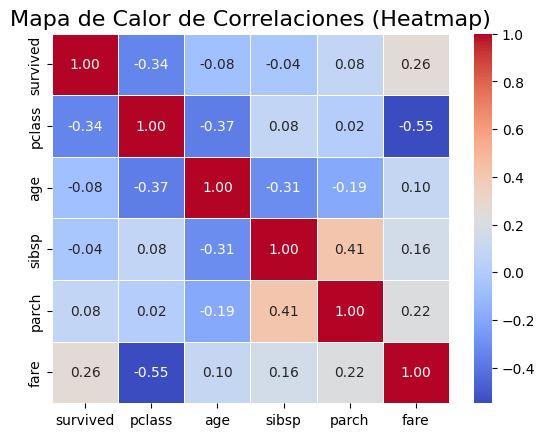

In [165]:
matriz_correlacion = titanic.corr(numeric_only=True)
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones (Heatmap)', fontsize=16)
plt.show()

Por ahora el analisis de correlacion podria indicar que el -0.34 de la variable Supervivencia y Pclass a mayor numero de clase (clase 3) menor supervivencia y el 0.26 en la variable Supervivencia y fare confirma que quienes pagaron más, tuvo más opciones de sobreivir.

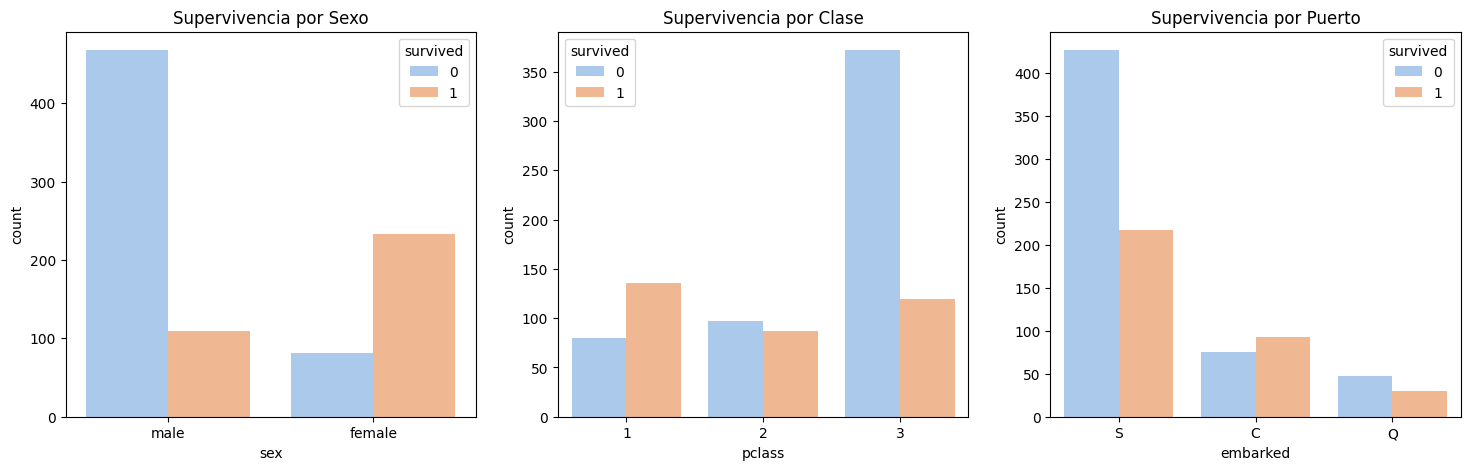

In [166]:
# Gráficos de Variables Categóricas 
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Sexo vs Supervivencia
sns.countplot(x='sex', hue='survived', data=titanic, ax=axes[0], palette='pastel')
axes[0].set_title('Supervivencia por Sexo')

# 2. Clase vs Supervivencia
sns.countplot(x='pclass', hue='survived', data=titanic, ax=axes[1], palette='pastel')
axes[1].set_title('Supervivencia por Clase')

# 3. Puerto de Embarque vs Supervivencia
sns.countplot(x='embarked', hue='survived', data=titanic, ax=axes[2], palette='pastel')
axes[2].set_title('Supervivencia por Puerto')

plt.show()


En el histograma se puede tener un analisis de los sobrevivientes con respecto a las varibales Categoricas

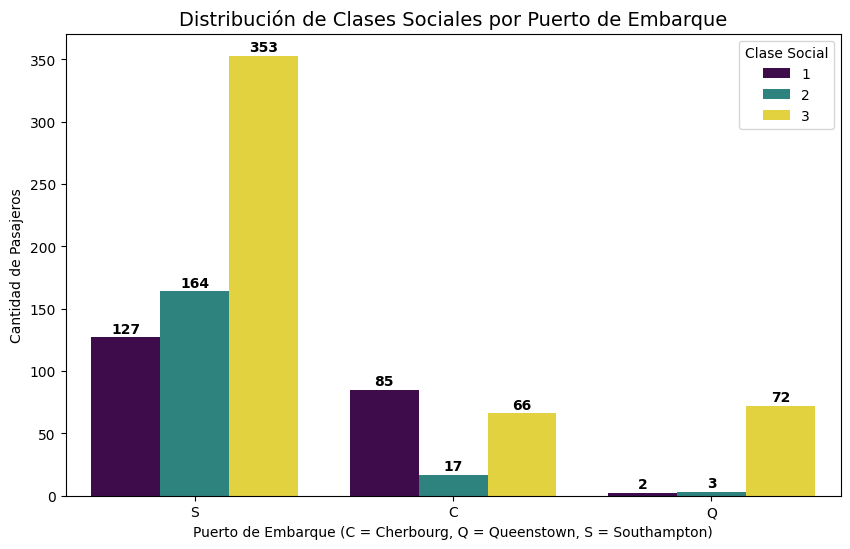

In [167]:
# --- ANÁLISIS: Relación entre Puerto y Clase Social ---

plt.figure(figsize=(10, 6))

# Creamos el gráfico: Eje X = Puerto, Hue (Color) = Clase
ax = sns.countplot(x='embarked', hue='pclass', data=titanic, palette='viridis')

# Personalización
plt.title('Distribución de Clases Sociales por Puerto de Embarque', fontsize=14)
plt.xlabel('Puerto de Embarque (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Cantidad de Pasajeros')
plt.legend(title='Clase Social', loc='upper right')

# Añadir números exactos sobre las barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=1, fontsize=10, fontweight='bold')

plt.show()

**Análisis de grafico de distribución de la variable embarked por clase:** Permite identificar que del puerto de amberque S (Southampton) la mayoria de los pasajeros eran de clase 3, del puerto C (Cherbourg) la mayoria de los pasajeros eran de clase 1 y solo 66 pasajeros eran de clase 3, lo que indica que quienes embarcaron en ese puerto, eran más ricos que pobres, por último el puerto Q (Queenstown) la almenos el 95% eran clase 3.


--- Mapa de Datos Faltantes (Líneas blancas = Datos perdidos) ---


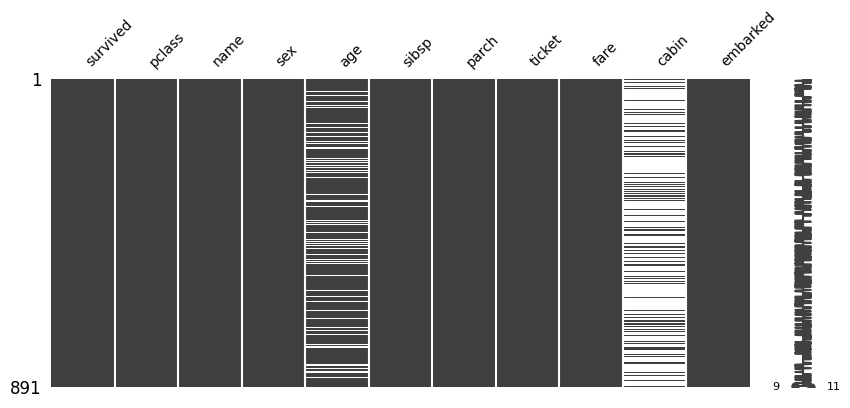

In [168]:
# Visualización de Datos Faltantes (Matriz de nulos)
print("\n--- Mapa de Datos Faltantes (Líneas blancas = Datos perdidos) ---")
import missingno as msno
msno.matrix(titanic, figsize=(10, 4), fontsize=10);

En la matriz de nulos se puede analizar las varibales que presentan rayas blancas son las varibles con más presencia de nulos

--- Histogramas de Distribución ---


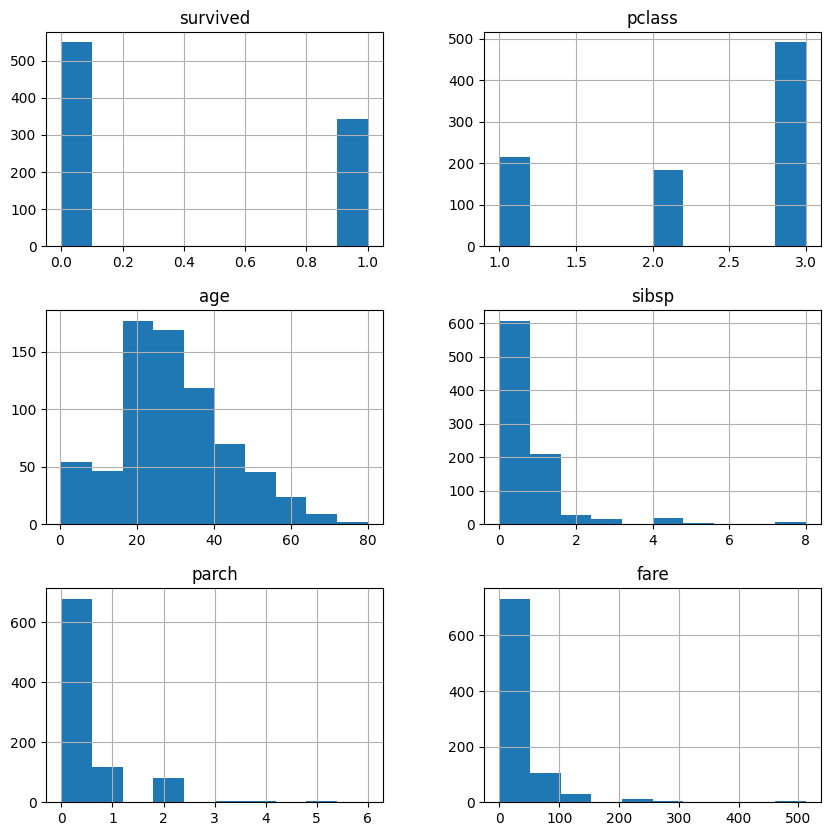

In [169]:
print("--- Histogramas de Distribución ---")
#Se ajusto el tamaño para que se vea bien
titanic.hist(figsize=(10,10))
plt.show()

In [170]:
#Si es 0 = simétrica (Campana de Gauss perfecta)
#Positiva = cola a la derecha
#Negativa = Cola a la Izquierda
print("--- Asimetria de los datos (Skewness) ---")
asimetria = titanic.skew(numeric_only=True)
print(asimetria)

--- Asimetria de los datos (Skewness) ---
survived    0.478523
pclass     -0.630548
age         0.389108
sibsp       3.695352
parch       2.749117
fare        4.787317
dtype: float64


Si el valor resultante para la asimetría está por encima de +1 o por debajo de -1, los datos están muy sesgados. Si está entre +0.5 y -0.5, están sesgados moderadamente. Si el valor es 0, entonces los datos son simétricos.

¿Se puede eliminar alguna variable a partir del análisis exploratorio llevado a cabo?

**<Center>Conclusión del Análisis Exploratorio</Center>**

Tras el análisis estadistico y visual del conjunto de datos original (891 Registros), he detectado los siguientes puntos clave que guiaán la fase de preprocesamiento:

**Desbalance de la variable objetivo:** La mayoria de los pasajeros no sobrevivió (aproximadamente 60% fallecio vs 40% de supervivientes).  
**Correlaciones Numéricas:** -Existe una correlación negativa notable entre la clase (PClass) y superviviencia: los pasajeros de la tercera clase tuvieron mucha menos probabilidad de sobrevivir.  
-Existe una correlación positiva con la Tarifa (Fare): a mayor precio del billete, mayor superviviencia.  
Cabe resaltar que se debe realizar una limpieza de datos para generar correlaciones más justas.  

**Importancia de Genero:** Aunque la grafica de correlación no lo muestra, en el histograma se pued eidentificar que la mayoria de las mujeres sobrevivio.
**Calidad de los Datos:** la variable Cabin tiene demasiados datos perdidos, al rededor del 75%. La variable edad tiene un aproximado del 20% de valores perdidos. La variable Embarked solo tiene 2 nulos.


## Detección de outliers

Aplicar técnicas para detectar los valores sospechosos de ser atípicos: método basado en la desviación típica, rango intercuartílico y diagrama de caja.


<Axes: >

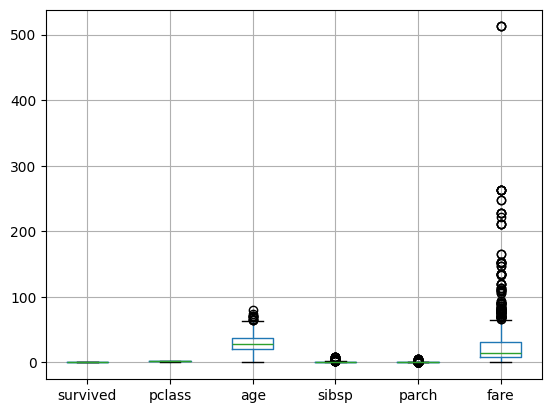

In [171]:
titanic.boxplot()

Se considera necesario mejorar el diagrama de Cajas anterior, ya que la variación en los datos es muy alta, mientras que la variable survived solo tiene 0 y 1, la variable age maximo llega a 80, la variable fare (Tarifa) es suerior a 500 lo que no permite hacer una deteccion adecuada.

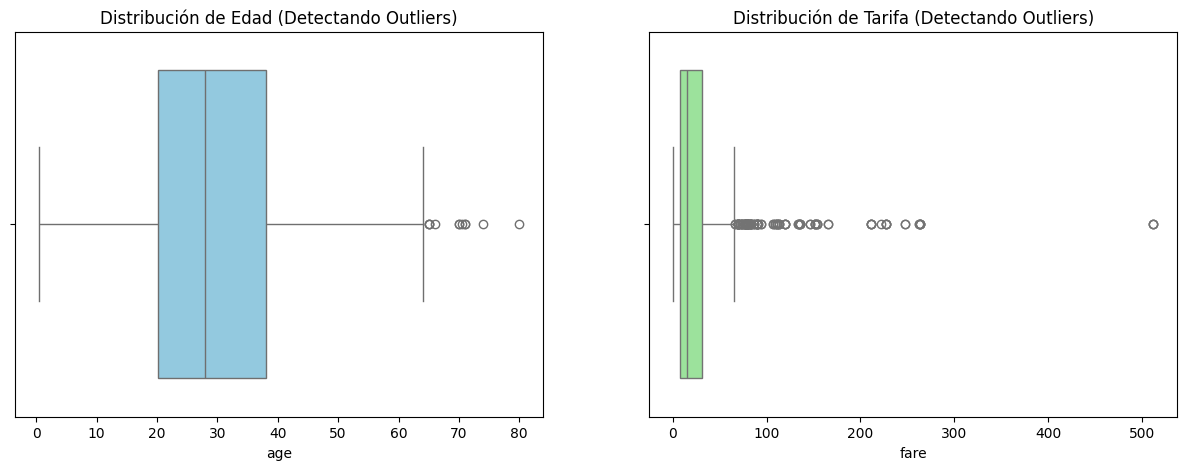

In [173]:
#Graficos de Cajas separado
fig, axes = plt.subplots(1, 2, figsize=(15,5))

#1. Boxplot de edad
sns.boxplot(x=titanic['age'], ax=axes[0], color='skyblue')
axes[0].set_title('Distribución de Edad (Detectando Outliers)')

#2. Boxplot de Tarifa
sns.boxplot(x=titanic['fare'], ax=axes[1], color='lightgreen')
axes[1].set_title('Distribución de Tarifa (Detectando Outliers)')

plt.show()


Analisis diagrama de cajas

In [174]:
#Método Numérico (Rango Intercuartilico - IQR)
print("--- Detección por Rango Intercuartílico (IQR) ---")

def detectar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return outliers, limite_inferior, limite_superior

#Aplicamos a variable fare(Tarifa)
outliers_fare, inf, sup = detectar_outliers_iqr(titanic, 'fare')
print(f"Límites para Tarifa: {inf:.2f} a {sup: .2f}")
print(f"Cantidad de pasajeros con tarifa atípica: {len(outliers_fare)}")

#aplicamos a variable age(Edad)
outliers_age, inf_a, sup_a = detectar_outliers_iqr(titanic, 'age')
print(f"Límites para Edad: {inf_a: 02f} a {sup_a: .2f}")
print(f"Cantidad de pasajeros con edad atípica: {len(outliers_age)} ")

--- Detección por Rango Intercuartílico (IQR) ---
Límites para Tarifa: -26.72 a  65.63
Cantidad de pasajeros con tarifa atípica: 116
Límites para Edad: -6.687500 a  64.81
Cantidad de pasajeros con edad atípica: 11 


**Decisión sobre los Valores Atípicos (Outliers)**  

Tras analizar los diagramas de caja y los rangos intercuartílicos, he tomado las siguientes decisiones basadas en el conocimiento del negocio (contexto histórico):  

Variable Edad (Age): Se detectan valores superiores al límite superior (aprox. 65 años) llegando hasta los 80.  

Decisión: NO eliminar. Aunque estadísticamente son atípicos, representan pasajeros reales de edad avanzada. Dado que la edad es un factor crítico de supervivencia, estos datos son importantes.  

Variable Tarifa (Fare): Se detectan valores extremos (hasta 512) muy por encima del límite IQR (aprox. 66).  

Decisión: NO eliminar filas. Estos valores pueden corresponder a las suites de lujo de 1ª Clase. Eliminar estos datos introduciría un sesgo negativo, ya que la clase alta tuvo mayor tasa de supervivencia.  

Tratamiento futuro: Para los valores atípicos encontrados en la variable fare aplicare un tope en el cual en la cual los valores que superen un limite x sean tomados como el limite, asi la magnitud del numero no afecta negativamente y a su vez no perdemos datos valiosos.

¿Qué ocurre con la variable *fare*?

¿Y el resto de las variables?


## Detección datos perdidos

Hay que comprobar que el conjunto de datos esté completo, es decir, hay que comprobar que no haya datos perdidos.
 
 ¿Qué variables cuentan con datos perdidos en este conjunto de datos?
  
  
  ¿Qué ocurre con las cabinas de los pasajeros de tercera clase?
  
  
  ¿Existe algún pasajero de primera clase que no tenga asignada cabina?
  
 
  ¿Se establece NaN a los datos perdidos?

In [175]:
#Conteno de no-nulos en variables numéricas
#muestra cuantos datos hay excluyendo vacios (solo columnas numéricas)
titanic.describe().loc['count']

survived    891.0
pclass      891.0
age         714.0
sibsp       891.0
parch       891.0
fare        891.0
Name: count, dtype: float64

**Analisis Nulos**
Se puede identificar que la variable age(edad) tiene valores nulos

In [176]:
#conteno general de no-nulos
#Incluye todas las variables
titanic.count()

survived    891
pclass      891
name        891
sex         891
age         714
sibsp       891
parch       891
ticket      891
fare        891
cabin       204
embarked    889
dtype: int64

**Analisis Nulos general:** se puede evidenciar que las variables cabin(Cabina) y embarked(embarque) contienen datos nulos

In [177]:
#Suma cuantos nulos hay en cada columna
print(titanic.isnull().sum())

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64


**Análisis de nulos:** aqui se puede evidenciar los valores exacto faltantes:  
age = 177  
cabin = 687  
embarked =  2

In [178]:
#Ver registros que tienen la edad vacía
display(titanic[titanic['age'].isnull()].head())


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


**Análisis de variable age con datos nulos:** solo se trae la tabla con los primeros 5 registros para no saturar visualmente

<Axes: >

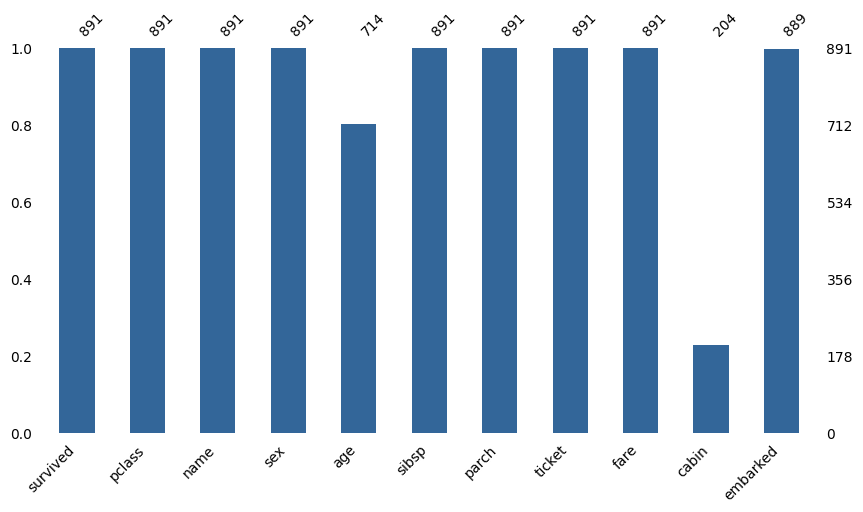

In [179]:
#print("--- Visualización de la complettud ---")
msno.bar(titanic, color=(0.2, 0.4, 0.6, 1), figsize=(10, 5), fontsize=10)

**Análisis Nulos en grafico de barras:** Con este grafico de barras se puede análizar mejor las variables con datos nulos.

In [180]:
#Ordenar por la variable cabin para poner los Nulos al final de la tabla
titanic.sort_values("cabin", ascending = True, na_position ='last')

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
583,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C
475,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
556,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C
284,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S
599,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C
...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


**Tabla Ordenada con daros Nulos al Final**

In [181]:
#Crear un filtro de la variable cabin = nulos
cabin_ord=titanic['cabin'].isnull()
display(titanic[cabin_ord].head())

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


**BD solo con registros nulos en la variable cabin:**  
son 678 registros, se utiliza comando .head para traer solo los 5 primeros y no saturar visualmente.

In [182]:
#Verificar los valores de la variable embarked
print(titanic.loc[:,'embarked'].value_counts())

embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [183]:
#Verificar los nulos de la variable embarked
display(titanic[titanic['embarked'].isnull()])

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


**Análisis de Nulos variable embarked:**  
Se visualizan las dos lineas con registros nulos en la variable embarked, ambas son mujeres y son sobrevivientes, de primera clase, sin familiares abordo ni hijos y ambas en cabina B28.

In [184]:
#Verificación específica de Clase 1 (Muestra pasajeros de clase 1 para ver si todos tiene cabina)
display(titanic[(titanic['pclass']) == 1].head())

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


In [185]:
#Calculamos el % de datos faltantes en cada variable
total_filas= titanic.shape[0]
porcentaje_nulos = (titanic.isnull().sum() / total_filas) * 100
print(porcentaje_nulos[porcentaje_nulos > 0])

age         19.865320
cabin       77.104377
embarked     0.224467
dtype: float64


**Análisi porcentual de datos Nulos en laas variables:**  
Se puede evidenciar que las variables tienen el siguiente porcentaje de valores Nulos:  
age 19.86%  
cabin 77.10%  
embarked 0.22%  

In [186]:
#Verificar los valores de la variable pclass
print(titanic.loc[:,'pclass'].value_counts())

pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [187]:
# Análisis de la clase 1 sin cabina
clase1_sin_cabina = titanic[(titanic['pclass'] == 1) & (titanic['cabin'].isnull())]
print(f"Número exacto de pasajeros de 1ª Clase SIN cabina: {len(clase1_sin_cabina)}")

Número exacto de pasajeros de 1ª Clase SIN cabina: 40


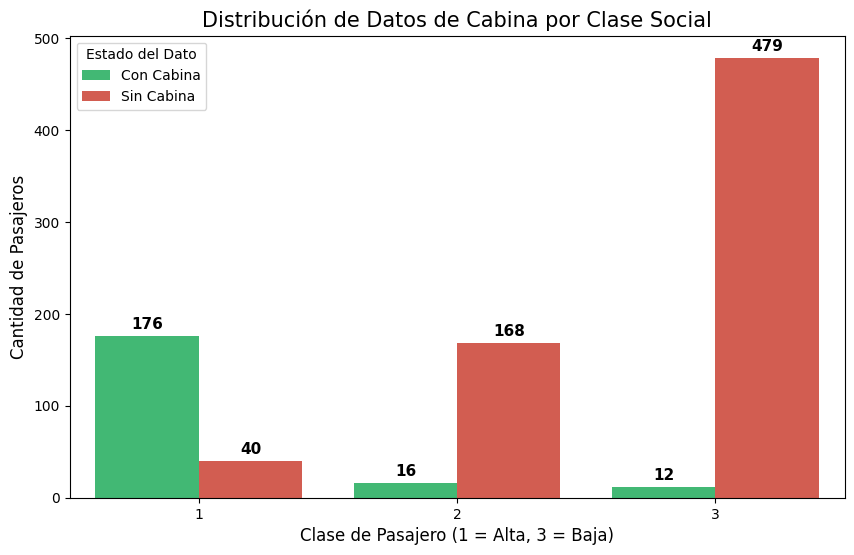

In [188]:
# --- ANÁLISIS CRUZADO: DISPONIBILIDAD DE CABINA POR CLASE ---

# 1. Creamos una columna temporal solo para esta gráfica
# Si 'cabin' es nulo -> 'Sin Cabina', si tiene dato -> 'Con Cabina'
titanic['status_cabina'] = titanic['cabin'].apply(lambda x: 'Sin Cabina' if pd.isnull(x) else 'Con Cabina')

# 2. Configuración del gráfico
plt.figure(figsize=(10, 6))

# 3. Creamos el gráfico de barras agrupado (hue separa por status)
ax = sns.countplot(x='pclass', hue='status_cabina', data=titanic, palette={'Con Cabina': '#2ecc71', 'Sin Cabina': '#e74c3c'})

# 4. Personalización
plt.title('Distribución de Datos de Cabina por Clase Social', fontsize=15)
plt.xlabel('Clase de Pasajero (1 = Alta, 3 = Baja)', fontsize=12)
plt.ylabel('Cantidad de Pasajeros', fontsize=12)
plt.legend(title='Estado del Dato')

# 5. Añadir los números exactos encima de las barras (Automático)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=11, fontweight='bold')

plt.show()

# (Opcional) Borramos la columna temporal para dejar el dataset limpio como estaba
titanic.drop(columns=['status_cabina'], inplace=True)

**Análisi de grafica Calidad del dato variable pclass y cabin:**  
El grafico permite identificar la cantidad de datos con cabina y sin cabina para cada una de las clases lo que a su vez permite ver que:  
Clase 1 con 216 registros: 176 con cabina y 40 sin cabina.  
Clase 2 con 184 resgitros: 16  con cabina 168 sin cabina.  
Clase 3 con 491 registros: 12  con cabina 479 sin cabina.  

**Respuesta preguntas de detección de datos perdidos**

**Variables con datos perdidos:**  
age = 177  -  19.86%  
cabin = 687  - 77.10%  
embarked =  2 - 0.22%  

**Cabinas pasajeros tercera clase:**  
La clase 3 con la gran mayoria de registros (491) solo 12 de ellos tienen registrado dato en cabina, los demas no tiene registro (479).  

**Pasajeros de la Clase 1 sin cabina:**
Si, de un total de 216 pasajeros en primera clase, 176 tiene cabina y 40 tienen registro nulo (sin cabina).  

**Se establece NaN a los datos perdidos:**
Si, python marca los vacíos como NaN.




## Conclusión del análisis exploratorio

**Calidad del dato y valores nulos:**  
**Variable Cabin:** representa el 77.1% de datos faltantes (687 registros) los cuales afectan masivamente a las clases 2 y 3 mientras que la clase 1 contiene la mayoria de los registros.  
_Decisión:_ Eliminar la variable, ya que intentar imputar datos crearia un sesgo.  

**variable age:** faltan el 19.8% de datos (177 registros nulos) está es una variable determinante por que puede representar niños y ancianos, por lo cual no se puede eliminar estas filas. 
_Decisión:_ imputar datos

**Análisis de Outliers (Valores Atipicos):** 

**Variable age:** se detectan valores hasta los 80 años, se consideran datos válidos y necesarios para el modelo.  
**Variable fare:** se detectan tarifas extremadamente altas hasta 512, muy por encima del rango intercuartilico. corresponde a pasajeros VIP reales.
_Decisión:_ No se elimaran filas para no perder información de la clase alta, pero se aplicarán técnicas de escalado para suavizar su impacto numérico.

**PATRONES DE SUPERVIVENCIA:**  
Existe una correlación entre clase social (pclass) y supervivencia: a mejor clase, mayor probabilidad de sobrevivencia.  
Tambien se evidencia que en el genero female son las que más sobreviven.



# Creación X e Y

En el conjunto de datos es necesario separar la variable dependiente (variable a predecir Y) de las variables independientes (variables predictoras X).

In [189]:
#X variables predictoras axis=1 indica que borramos una columna no una fila

X = titanic.drop('survived', axis=1)

#Y variable objetivo.

Y = titanic['survived']


In [190]:
#Validamos

print(f"Dimensiones de X: {X.shape}")
print(f"Dimensiones de y: {Y.shape}")

Dimensiones de X: (891, 10)
Dimensiones de y: (891,)


In [191]:
#Validamos visualmente la tabla

display(X.head())
display(Y.head())

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

# División de los datos

El objetivo de un modelo es predecir la variable respuesta en observaciones futuras o en observaciones a las que el modelo no se ha enfrentado con anterioridad. El error medido sobre el conjunto de entrenamiento (predice observaciones conocidas) puede ayudar a comprender cómo aprende el modelo, pero no constituyen una estimación realista de su comportamiento. El error de entrenamiento es demasiado optimista. 

Para obtener una estimación más precisa el error se mide sobre predicciones realizadas cuando se aplica el modelo al conjunto de prueba. Por lo tanto, antes de construir el modelo, utilizamos Hold-out para dividir el conjunto de datos inicial en dos subconjuntos: el de entrenamiento y el de prueba. De esta manera, el subconjunto de entrenamiento se utilizará para que los algoritmos aprendan y el de prueba para predecir y medir el rendimiento de los modelos.

In [192]:
# División del conjunto en entramiento y test para realizar las predicciones
from sklearn import model_selection

test_size = 0.30
seed = 100

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)


print(f"Entrenamiento (X_train, Y_train): {X_train.shape[0]} filas")
print(f"Prueba (X_test, Y_test): {X_test.shape[0]} filas")


Entrenamiento (X_train, Y_train): 623 filas
Prueba (X_test, Y_test): 268 filas


# Depuración de los datos

## Fase I: Eliminación de variables

In [193]:
#Visualizar columnas
print(list(X_train.columns))

['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked']


In [194]:
#Definimos las columnas que queremos eliminar

columnas_a_eliminar = ['cabin', 'name', 'ticket']

In [195]:
print(f"Columnas antes de borrar: {X_train.shape[1]}")
print(f"Columnas antes de borrar: {X_test.shape[1]}")

Columnas antes de borrar: 10
Columnas antes de borrar: 10


In [196]:
#eliminamos en el conjunto de entrenamiento

X_train = X_train.drop(columnas_a_eliminar, axis=1)
X_test = X_test.drop(columnas_a_eliminar, axis=1)

In [197]:
#Visualizar columnas
print(list(X_train.columns))
print(list(X_test.columns))

['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']


In [198]:
print(f"Columnas despuess de borrar: {X_train.shape[1]}")
print(f"Columnas despues de borrar: {X_test.shape[1]}")

Columnas despuess de borrar: 7
Columnas despues de borrar: 7


**Decisión Eliminación de Variables:**  

Las variables que decidi eliminar son las siguientes: **cabin** por que tiene muchos campos nulos al rededor del 77% de registros, la variable **name** ya que el nombre es un texto unico, el modelo matématico no lo puede operar y la variable **ticket** ya que son codigos casi todos distintos y no aportan información.

## Fase II: Tratamiento de outliers

Aplicar técnicas para detectar los valores sospechosos de ser atípicos: método basado en la desviación típica, rango intercuartílico y diagrama de caja.


In [199]:
#Rango intercuartilico de la columna fare

Q1 = X_train['fare'].quantile(0.25)
Q3 = X_train['fare'].quantile(0.75)
IQR = Q3 - Q1 # rango intercuartilico

limite_superior = Q3 + 1.5 * IQR

print(f"limite de corte para la variable fare (tarifa) {limite_superior: .2f}")

limite de corte para la variable fare (tarifa)  66.34


In [200]:
#Filtramos los datos en los cuales la columna fire sea menor o igual al limite superior
filas_a_conservar = X_train['fare'] <= limite_superior


In [201]:
#cuantos registros se eliminaran
n_eliminados = len(X_train) - filas_a_conservar.sum()
print(f"registros a eliminar de pasajeros con tarifa atípica (Clase Vip): {n_eliminados}")

registros a eliminar de pasajeros con tarifa atípica (Clase Vip): 87


In [202]:
#Aplicamos el filtro al conjunto de X_train y Y_train
X_train = X_train[filas_a_conservar]
Y_train = Y_train[filas_a_conservar]

In [203]:
#Validamos tamaño final de los conjuntos
print(f"X_train {X_train.shape}")
print(f"Y_train {Y_train.shape}")

X_train (536, 7)
Y_train (536,)


**Aclaración tratamiento de Outliers**  

Tome la decisión de no eliminar los Outliers de la variable age ya que aunque el promedio de edad es 30 años, una edad de 80 que es la maxima registrada, no genera tanto ruido ya que es aproximandamente un poco más de 2 veces el valor del promedio, sin embargo la variable fare si tiene un promerio de pago de $30 y el maximo era de $512 alrededor de 17 veces más por lo cual estos valores son desproporcionales y me afectan el modelo matematico.

## Fase III: Tratamiento de valores perdidos - eliminación

Una opción para el tratamiento de valores perdidos es eliminar los registros completos que contengan algún dato perdido (Listwise Deletion).

Dado el análisis de detección de datos perdidos, ¿sería conveniente la eliminación de alguna de las variables que cuentan con valores incompletos? 

Si fuese así, pruebe a eliminarlos:

**<center>Simulación de borrado de datos<center>**

In [204]:
#Base temporal para analizar eliminaricon de registros
X_temp_eliminar = X_train.copy()
print(f"Filas antes de eliminar los nulos: {X_temp_eliminar.shape[0]}")

Filas antes de eliminar los nulos: 536


In [205]:
#borrar datos
X_temp_eliminar.dropna(inplace=True)
print(f"Filas después de eliminar nulos: {X_temp_eliminar.shape[0]}")

Filas después de eliminar nulos: 418


In [206]:
#Calculo de la perdida
perdida = len(X_train) - len(X_temp_eliminar)
print(f"Si eliminamos los nulos perderiamos {perdida} de registros de pasajeros")
print(f"esto es una perdida de {(perdida/len(X_train))*100: .1f}% de los datos de entrenamiento")

Si eliminamos los nulos perderiamos 118 de registros de pasajeros
esto es una perdida de  22.0% de los datos de entrenamiento


¿Qué ocurre? ¿Cómo afecta la eliminación?


Una alternativa es realizar la imputación de esos datos, que se realizará en el siguiente paso.

**Conclusión:**  
No es conveniente eliminar registros por datos faltantes, ya que esto representa el 22% de los registros que tenemos para entrenar el modelo.

## Fase III: Tratamiento de valores perdidos - imputación

Para la imputación de los datos perdidos, una técnica rápida y sencilla es utilizar la media/moda. 

Si la variable que contiene el dato perdido es cuantitativa se estima el valor con la media de los valores observados. Si por el contrario se trata de una variable categórica el valor perdido es estimado con la moda.

Para realizar la imputación de datos perdidos con esta técnica estadística:

### Imputación estadística por la media/moda

- Variables cuantitativas con datos perdidos

Estimar el valor con la media de los valores observados.

Calcular la media para esa variable y asignar ese valor a los NaN.

In [207]:
#Creamos una copia 
X_train_imp = X_train.copy()
X_test_imp = X_test.copy()

In [208]:
#Imputación de la media para la variable cuantitativa age
promedio_edad = X_train_imp['age'].mean()
print(f"Edad promedio calculada: {promedio_edad: .2f} años")

Edad promedio calculada:  29.34 años


In [209]:
#imputamos los campos nulos para la base de entrenamiento y la de test pero solo con la media obtenida con los datos de entrenamiento
X_train_imp['age'] = X_train_imp['age'].fillna(promedio_edad)
X_test_imp['age'] = X_test_imp['age'].fillna(promedio_edad)

In [210]:
#Suma cuantos nulos hay en cada columna
print(X_train_imp.isnull().sum())

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64


In [211]:
#Suma cuantos nulos hay en cada columna
print(X_test_imp.isnull().sum())

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    1
dtype: int64


- Variables categóricas con datos perdidos

Estimar el valor con la moda, valor que más se repite, el más frecuente.

Calcular la moda para esa variable y asignar ese valor a los NaN.

In [213]:
#Imputación de la moda para la variable categorica embarked
modo_embarked = X_train_imp['embarked'].mode()[0]
print(f"Puerto de embarque más común (Moda): {modo_embarked}")

Puerto de embarque más común (Moda): S


In [214]:
#Imputar datos en conjutno train y test
X_train_imp['embarked'] = X_train_imp['embarked'].fillna(modo_embarked)
X_test_imp['embarked'] = X_test_imp['embarked'].fillna(modo_embarked)

**Comparación estadistica de la variable age**

In [215]:
print("Original (con nulos):")
print(X_train['age'].describe()[['mean', 'std']])
print("\nImputada (con media):")
print(X_train_imp['age'].describe()[['mean', 'std']])

Original (con nulos):
mean    29.336914
std     14.196972
Name: age, dtype: float64

Imputada (con media):
mean    29.336914
std     12.533919
Name: age, dtype: float64


<Axes: >

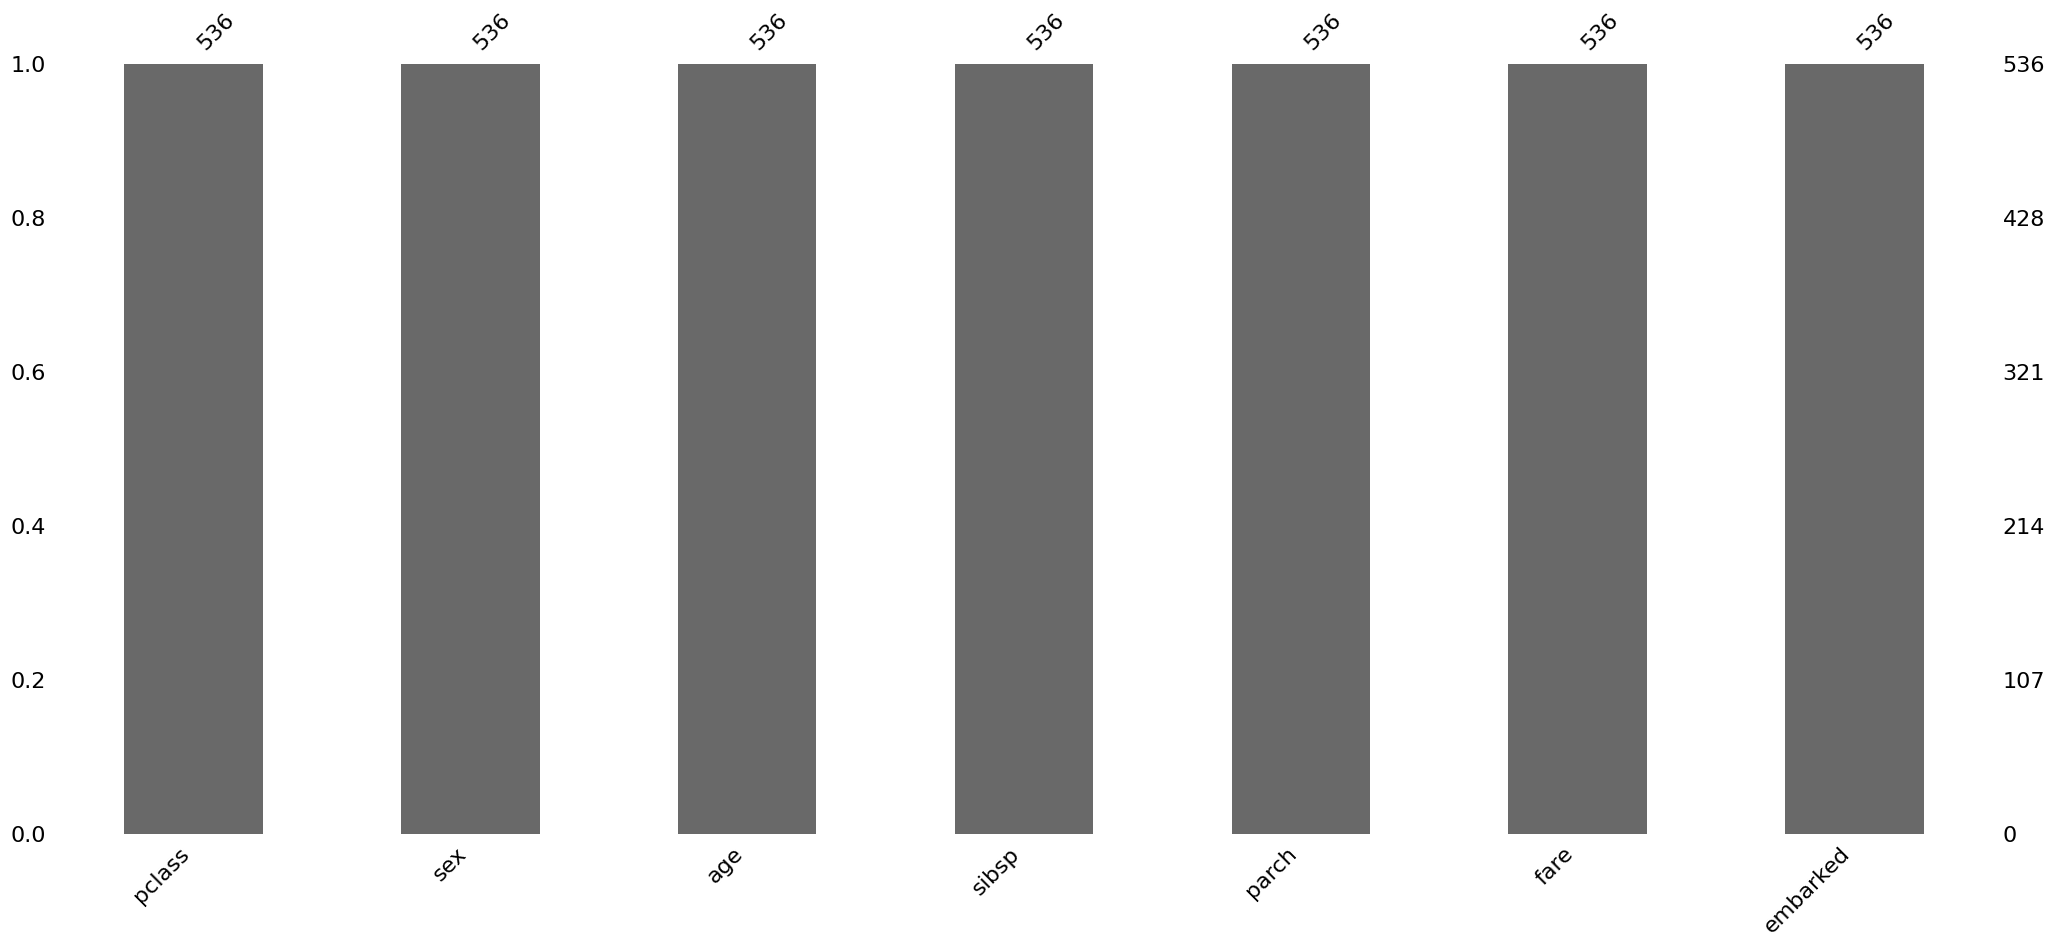

In [216]:
#Grafico de nulos
msno.bar(X_train_imp)

<Axes: >

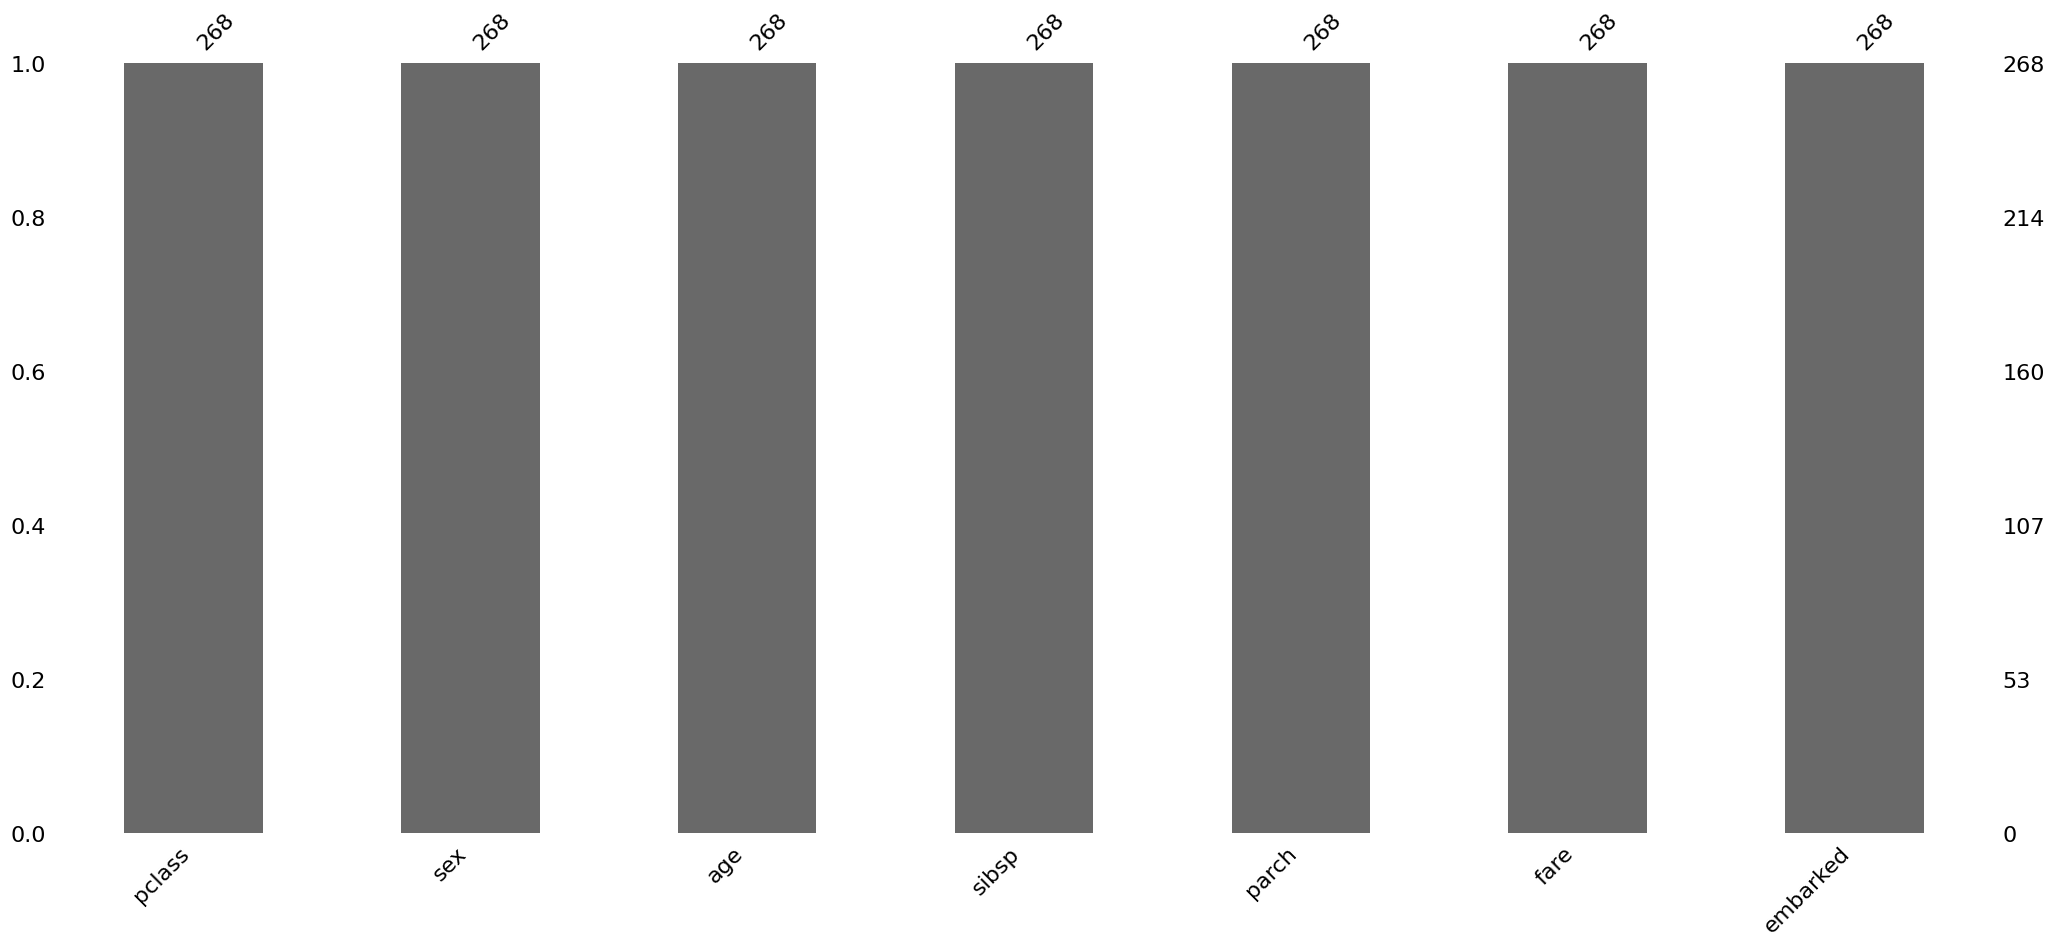

In [217]:
#Grafico de nulos
msno.bar(X_test_imp)

### Imputación por el vecino más cercano

Se pueden utilizar otros métodos memos simples para realizar la imputación, por ejemplo método de interpolación.

El método de interpolación más simple es localizar el valor del registro más cercano y asignar al dato perdido el mismo valor que tenga ese registro en ese atributo. 

Para reemplazar los datos incompletos con el valor del vecino más cercano en las variables en la que se ha detectado datos perdidos.

In [218]:
from sklearn.impute import KNNImputer

In [219]:
#Creamos copia de KNN
X_train_knn = X_train.copy()
X_test_Knn = X_test.copy()

In [220]:
#Seleccionamos solo las columnas numericas, ya que KNN solo aplica para valores cuantitativos
cols_numericas = ['pclass', 'sibsp', 'parch', 'fare', 'age']

In [221]:
print(cols_numericas)

['pclass', 'sibsp', 'parch', 'fare', 'age']


In [222]:
#Configuramos el imputador con 5 vecinos mas cercanos
imputer = KNNImputer(n_neighbors=5)

In [223]:
#Aplicamos el imputador (fit y transform)
matriz_imputada = imputer.fit_transform(X_train_knn[cols_numericas])

In [224]:
#Actualizamos la columna age en la copia con los nuevos valores
X_train_knn['age'] = matriz_imputada[:,4]

In [225]:
#Imputamos valores knn de train al conjunto de test usando solo (Transform)
matriz_test_imputada = imputer.transform(X_test_Knn[cols_numericas])

In [226]:
#Asignar la columna age calculada
X_test_Knn['age'] = matriz_test_imputada[:, 4]

In [227]:
#comparación
print("\n--- Comparación Final de Desviación Estándar (Std) ---")
print(f"1. Original (Con nulos): {X_train['age'].std():.4f}")
print(f"2. Imputación Media:     {X_train_imp['age'].std():.4f} (Baja varianza)")
print(f"3. Imputación KNN:       {X_train_knn['age'].std():.4f} (¿Conserva mejor la varianza?)")
print(f"Nulos restantes en X_test_knn: {X_test_Knn['age'].isnull().sum()}")


--- Comparación Final de Desviación Estándar (Std) ---
1. Original (Con nulos): 14.1970
2. Imputación Media:     12.5339 (Baja varianza)
3. Imputación KNN:       13.0403 (¿Conserva mejor la varianza?)
Nulos restantes en X_test_knn: 0


**Análisis de Desviación:**  
de acuerdo con el comparativo de la desviación del conjunto original, el de imputación con la media y el de imputación knn decido quedarme con la imputación knn ya que esta es mas cercana a la original, tambien es verdad que es mas robusta y no esta basada solo en la media de una columna si no en todos sus 5 vecinos mas cercanos dde todo el conjunto de datos.

In [228]:
#Verificar que las tablas tengan datos acordes y que la imputacion de la media no altero el conjunto de datos
display(X_train_imp)

,pclass,sex,age,sibsp,parch,fare,embarked
69,3,male,26.000000,2,0,8.6625,S
85,3,female,33.000000,3,0,15.8500,S
794,3,male,25.000000,0,0,7.8958,S
161,2,female,40.000000,0,0,15.7500,S
815,1,male,29.336914,0,0,0.0000,S
...,...,...,...,...,...,...,...
866,2,female,27.000000,1,0,13.8583,C
350,3,male,23.000000,0,0,9.2250,S
79,3,female,30.000000,0,0,12.4750,S
855,3,female,18.000000,0,1,9.3500,S


In [229]:
#Verificar que las tablas tengan datos acordes y que la imputacion de knn no altero el conjunto de datos
display(X_train_knn)

,pclass,sex,age,sibsp,parch,fare,embarked
69,3,male,26.0,2,0,8.6625,S
85,3,female,33.0,3,0,15.8500,S
794,3,male,25.0,0,0,7.8958,S
161,2,female,40.0,0,0,15.7500,S
815,1,male,38.2,0,0,0.0000,S
...,...,...,...,...,...,...,...
866,2,female,27.0,1,0,13.8583,C
350,3,male,23.0,0,0,9.2250,S
79,3,female,30.0,0,0,12.4750,S
855,3,female,18.0,0,1,9.3500,S


In [230]:
#Verificar que las tablas tengan datos acordes y que la imputacion de la media no altero el conjunto de datos
display(X_test_imp)

,pclass,sex,age,sibsp,parch,fare,embarked
205,3,female,2.000000,0,1,10.4625,S
44,3,female,19.000000,0,0,7.8792,Q
821,3,male,27.000000,0,0,8.6625,S
458,2,female,50.000000,0,0,10.5000,S
795,2,male,39.000000,0,0,13.0000,S
...,...,...,...,...,...,...,...
111,3,female,14.500000,1,0,14.4542,C
730,1,female,29.000000,0,0,211.3375,S
105,3,male,28.000000,0,0,7.8958,S
479,3,female,2.000000,0,1,12.2875,S


In [231]:
#Verificar que las tablas tengan datos acordes y que la imputacion de knn no altero el conjunto de datos
display(X_test_Knn)

,pclass,sex,age,sibsp,parch,fare,embarked
205,3,female,2.0,0,1,10.4625,S
44,3,female,19.0,0,0,7.8792,Q
821,3,male,27.0,0,0,8.6625,S
458,2,female,50.0,0,0,10.5000,S
795,2,male,39.0,0,0,13.0000,S
...,...,...,...,...,...,...,...
111,3,female,14.5,1,0,14.4542,C
730,1,female,29.0,0,0,211.3375,S
105,3,male,28.0,0,0,7.8958,S
479,3,female,2.0,0,1,12.2875,S


In [247]:
#Actualización de los datos imputados por el metodo KNN en el conjunto de datos original
X_train = X_train_knn.copy()
X_test = X_test_Knn.copy()

In [248]:
#Validación de nulos
print(f"Nulos restantes en X_train: {X_train.isnull().sum().sum()}")
print(f"Nulos restantes en X_test:  {X_test.isnull().sum().sum()}")

Nulos restantes en X_train: 0
Nulos restantes en X_test:  1


In [249]:
#Imputar MODA en conjutno train y test
X_train['embarked'] = X_train['embarked'].fillna(modo_embarked)
X_test['embarked'] = X_test['embarked'].fillna(modo_embarked)

In [250]:
#Validación de nulos
print(f"Nulos restantes en X_train: {X_train.isnull().sum().sum()}")
print(f"Nulos restantes en X_test:  {X_test.isnull().sum().sum()}")

Nulos restantes en X_train: 0
Nulos restantes en X_test:  0


**Análisis Boxplot limpieza de Outliers**

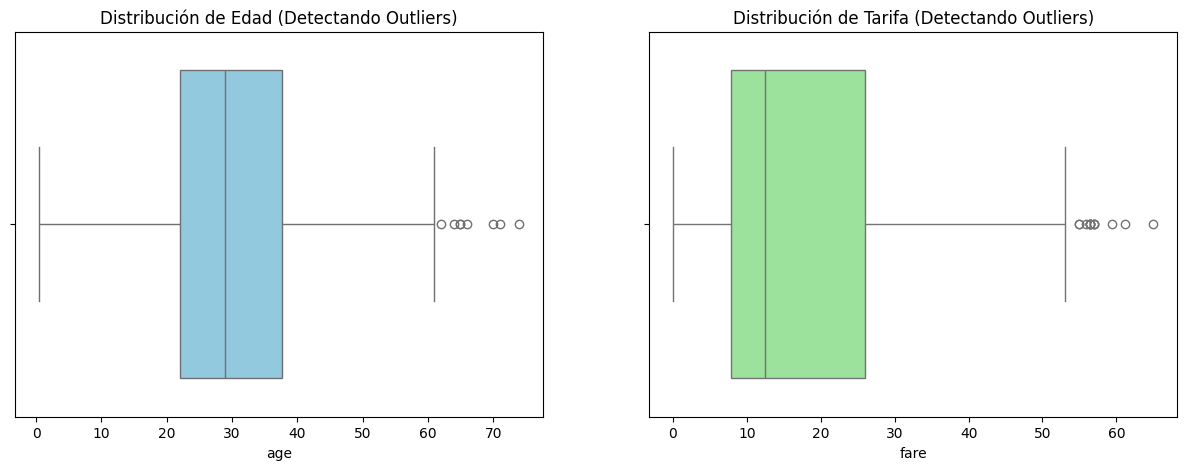

In [251]:
#Graficos de Cajas separado
fig, axes = plt.subplots(1, 2, figsize=(15,5))

#1. Boxplot de edad
sns.boxplot(x=X_train['age'], ax=axes[0], color='skyblue')
axes[0].set_title('Distribución de Edad (Detectando Outliers)')

#2. Boxplot de Tarifa
sns.boxplot(x=X_train['fare'], ax=axes[1], color='lightgreen')
axes[1].set_title('Distribución de Tarifa (Detectando Outliers)')

plt.show()

**Variables categóricas**

Los algoritmos de aprendizaje automático no pueden funcionar directamente con las etiquetas de las variables categóricas. Requieren que las variables categóricas se conviertan en variables cuantitativas.

Podríamos usar una codificación entera directamente, pero esto solo es posible para variables ordinales donde existe una relación ordinal natural entre las categorías, por ejemplo: frío, tibio y caliente.

Cuando no hay una relación ordinal, permitir que la representación se apoye en dicha relación puede complicar la resolución del problema. En estos casos se define una variable binaria para cada categoría, la variable que corresponde a la categoría se establece en 1 y el resto de variables en 0.
La consistencia es importante para que podamos invertir la codificación más tarde y recuperar las etiquetas de los valores enteros, lo cual es necesario en el caso de hacer una predicción.

Esta codificación permite asegurar que todas las categorías tienen el mismo peso y los errores de una clasificación errónea a una categoría diferente que no corresponde tienen el mismo valor de pérdida.


In [252]:
#Columnas antes de codificación
print(f"Columnas antes del encoding: {X_train.shape[1]}")

Columnas antes del encoding: 7


In [255]:
#columnas a codificar
cols_a_codificar = ['sex', 'embarked']

In [256]:
#Aplicamos get_dummies (One Hot Encoding)
# drop_first=True elimina la primera opción para evitar redundancia (ej. si no es mujer, es hombre)
X_train = pd.get_dummies(X_train, columns=cols_a_codificar, drop_first=True, dtype=int)
X_test = pd.get_dummies(X_test, columns=cols_a_codificar, drop_first=True, dtype=int)


In [257]:
#Columnas después de codificación
print(f"Columnas antes del encoding: {X_train.shape[1]}")

Columnas antes del encoding: 8


In [258]:
#Verificamos en conjunto de entrenamiento
display(X_train.head(3))

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
69,3,26.0,2,0,8.6625,1,0,1
85,3,33.0,3,0,15.8500,0,0,1
794,3,25.0,0,0,7.8958,1,0,1


In [259]:
#Verificamos en conjunto de test
display(X_test.head(3))

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
205,3,2.0,0,1,10.4625,0,0,1
44,3,19.0,0,0,7.8792,0,1,0
821,3,27.0,0,0,8.6625,1,0,1


Realice la transformación sobre todas aquellas variables cualitativas en las que sea necesario.

In [260]:
#Ya se realizo la transformación

Recuerde realizar esa misma transformación a las mismas variables en el conjunto test.

In [261]:
#Tanto el conjunto de train como test quedo transformado

# Transformación de los datos

**Variables numéricas**

Se ha estudiado que los datos pueden ser normalizados o estandarizados para que la escala en la que se están midiendo no influya en el entrenamiento del modelo. Analice si alguna de las variables debería ser normalizada o estandarizada. Recuerde que se debe hacer una transformación u otra, no ambas.

**Normalización**:

Los datos pueden ser normalizados, es decir, se puede transformar el rango de valores a un intervalo determinado. 

Es una forma simple de escalar valores en una columna. Es el resultado de la resta del valor menos el valor mínimo entre la diferencia entre el valor máximo y el mínimo de la columna:

$$X_{norm} = \frac {X - X_{min}} {X_{max} - X_{min}}$$


Analizar si alguna de las variables necesita este tipo de transformación. 

**Estandarización**: 

Los datos pueden ser estandarizados, es decir, transformar los valores de los atributos para que tengan media 0 y
desviación 1. Sólo si la distribución es normal.

$$X_{estd} = \frac{X - \mu} {\sigma}$$


Analizar si alguna de las variables necesita este tipo de transformación. 

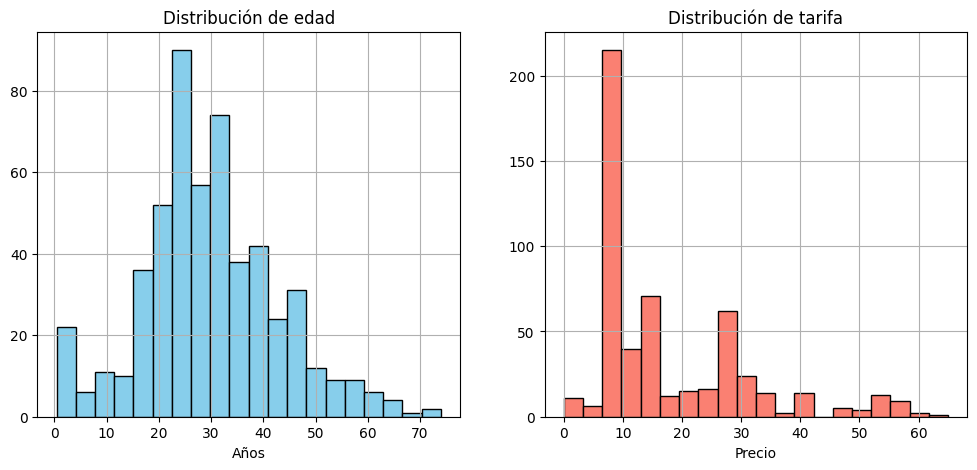

In [268]:
#Análisis de la distribución de las variables age y fare que son las dos variables numéricas principales
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
X_train['age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de edad')
plt.xlabel('Años')

plt.subplot(1, 2, 2)
X_train['fare'].hist(bins=20, color='salmon', edgecolor='black')
plt.title('Distribución de tarifa')
plt.xlabel('Precio')

plt.show()


**Análisis de distribución:**  
La distribución de la edad es una campana (Distribución normal), sin embargo la de tarifa parece ser un sesgo a la derecha, por lo cual se debe realizar la transofmración de los datos usando el metodo de Normalización.

**<Center>Normalización<center>**

In [269]:
#Iniciamos el normlizador
scaler = MinMaxScaler()

In [270]:
#Ajustamos y transformamos X_train
X_train_norm = scaler.fit_transform(X_train)

In [271]:
#Ajustamos y tranformamos X_test
X_test_norm = scaler.fit_transform(X_test)

In [272]:
#Reconstrucción de dataset
X_train = pd.DataFrame(X_train_norm, columns=X_train.columns)
X_test = pd.DataFrame(X_test_norm, columns=X_test.columns)

In [273]:
# Verificamos los mínimos y máximos para asegurarnos
print("Mínimos (deben ser 0):\n", X_train.min().head(3))
print("\nMáximos (deben ser 1):\n", X_train.max().head(3))

Mínimos (deben ser 0):
 pclass    0.0
age       0.0
sibsp     0.0
dtype: float64

Máximos (deben ser 1):
 pclass    1.0
age       1.0
sibsp     1.0
dtype: float64


In [274]:
#Verificación conjunto de entrenamiento
display(X_train.head())

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,1.0,0.347649,0.4,0.0,0.133269,1.0,0.0,1.0
1,1.0,0.442783,0.6,0.0,0.243846,0.0,0.0,1.0
2,1.0,0.334058,0.0,0.0,0.121474,1.0,0.0,1.0
3,0.5,0.537918,0.0,0.0,0.242308,0.0,0.0,1.0
4,0.0,0.513455,0.0,0.0,0.000000,1.0,0.0,1.0


In [275]:
#Verificación conjunto de test
display(X_test.head())

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,1.0,0.016765,0.0,0.166667,0.039876,0.0,0.0,1.0
1,1.0,0.231060,0.0,0.000000,0.030030,0.0,1.0,0.0
2,1.0,0.331905,0.0,0.000000,0.033016,1.0,0.0,1.0
3,0.5,0.621833,0.0,0.000000,0.040019,0.0,0.0,1.0
4,0.5,0.483172,0.0,0.000000,0.049547,1.0,0.0,1.0


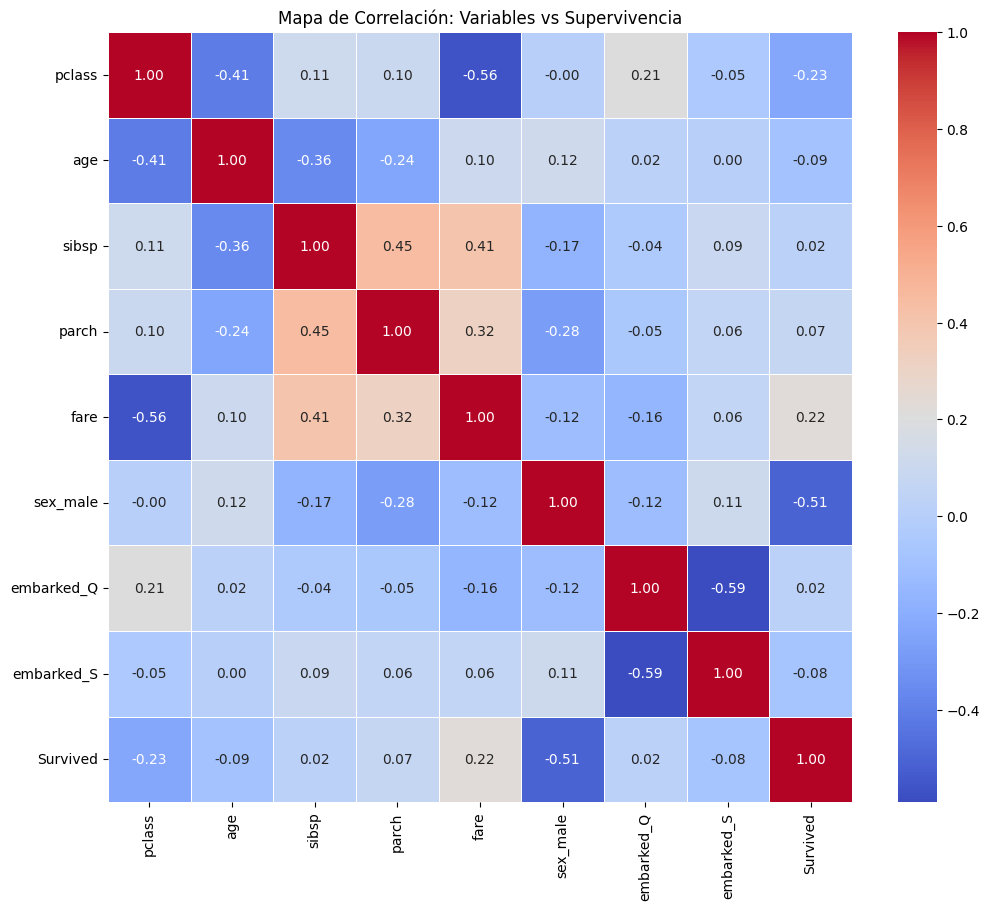

In [277]:
# --- ANÁLISIS DE CORRELACIÓN ---


# Unimos X_train y Y_train temporalmente para ver la correlación con la supervivencia
# (Asumimos que Y_train se llama 'survived'. Si es una Serie, usamos su nombre)
datos_completos = X_train.copy()

# A veces Y_train es un DataFrame o una Serie, aseguramos que tenga nombre
if isinstance(Y_train, pd.Series):
    datos_completos['Survived'] = Y_train.values
else:
    # Si es dataframe
    datos_completos['Survived'] = Y_train.iloc[:,0].values

#Calculamos la matriz de correlación
correlacion = datos_completos.corr()

#Configuramos el tamaño del gráfico
plt.figure(figsize=(12, 10))

# Dibujamos el Heatmap
# annot=True muestra los números dentro de los cuadros
# cmap='coolwarm' pone rojo para positivo y azul para negativo
# fmt=".2f" limita a 2 decimales
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Mapa de Correlación: Variables vs Supervivencia')
plt.show()

# Análisis correlación datos limpios

Algo que me gusta hacer despues de el tratamiento de datos es volver a generar el grafico de correlación, esto por que despues de eliminar Outliers, variables, imputar, transformar variables categoricas y normalizar, me permite hacer un mapeo general de las variables y su imparto sobre la variable de salida

En el grafico de correlación se puede identificar la correlacion de las variables con la de sobreviviencia.  
Variable sexo (sex), la mayor correlación, ya que esta cuenta con una correlacion de -0.51, matematicamente se podria decir que, cuando sex_male sube a 1 (es hombre), la supervivencia baja a 0 (muere) lo que a su vez nos podria indicar que las mujeres se salvan más.  

Variable clase (pclass) -0.23 correlación negativa, cuando la variable aumenta es decir clase 3, la variable supervivencia baja a 0 (muere).  

Variable tarifa(fare) +0.22 correlacion positiva, lo que quiere decir que a medida de que la variable fare aumenta (mayor valor de la tarifa), la variable supervivencia aumenta tambien 1 (sobrevive).  

Variable edad (age) -0.09 correlacion negativa, la correlación es muy baja, no logro entenderla (quizas el algoritmo de entrenamiento deba relacionar con otras variables).  

# Selección de características

Para hacer el estudio de supervivencia se puede llevar a cabo una selección de características. Existen muchas técnicas para llevar a cabo esta selección. Desde técnicas estadísticas hasta técnicas más complejas usando herramientas de aprendizaje automático. 

Aplique alguna técnica simple para hacer la selección.


**<center>Técnica de selección usada sera SelectKBest de la libreria Scikit-Learn<center>**

In [279]:
# --- FASE DE SELECCIÓN DE CARACTERÍSTICAS (SelectKBest) ---
from sklearn.feature_selection import SelectKBest, f_classif

In [280]:
#análisis de columnas antes de selección
print(f"Columnas ANTES de selección: {X_train.shape[1]}")
print(list(X_train.columns))

Columnas ANTES de selección: 8
['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q', 'embarked_S']


In [281]:
#configurar selector, k=5 significa que se quede con las 5 mejores
selector = SelectKBest(score_func=f_classif, k=5)

In [282]:
#entrenamos el selector con el conjunto de entrenamiento
selector.fit(X_train, Y_train)

,score_func,<function f_c...002673D896560>
,k,5


In [284]:
#Obtenemos las columnas get.support nos dice true o false para cada columna
cols_seleccionadas = X_train.columns[selector.get_support()]
print(list(cols_seleccionadas))

['pclass', 'age', 'fare', 'sex_male', 'embarked_S']


In [285]:
#Aplicamos las columnas seleccionadas a los conjuntos
X_train = X_train[cols_seleccionadas]
X_test = X_test[cols_seleccionadas]

In [287]:
#Validamos
print(f"Columnas después de selección: {X_train.shape[1]}")
display(X_train.head(3))

Columnas después de selección: 5


,pclass,age,fare,sex_male,embarked_S
0,1.0,0.347649,0.133269,1.0,1.0
1,1.0,0.442783,0.243846,0.0,1.0
2,1.0,0.334058,0.121474,1.0,1.0


# Conjunto test

Todo el preprocesamiento realizado al conjunto de entrenamiento debe realizarse también sobre el conjunto test para que el modelo pueda realizar una predicción adecuada sobre dicho conjunto.

Puede crear funciones y/o _pipeline_ para evitar repetir código al realizar el mismo proceso para el conjunto de prueba. Recordemos todas las fases:

## Carga del conjunto de datos

In [288]:
titanicRealTst = pd.read_csv('newData.csv')
titanicRealTst

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [289]:
X_final = titanicRealTst.copy()
X_final

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [290]:
X_final.shape

(418, 10)

## Exploración de los datos

In [291]:
display(X_final.describe())

,pclass,age,sibsp,parch,fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [292]:
X_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    418 non-null    int64  
 1   name      418 non-null    object 
 2   sex       418 non-null    object 
 3   age       332 non-null    float64
 4   sibsp     418 non-null    int64  
 5   parch     418 non-null    int64  
 6   ticket    418 non-null    object 
 7   fare      417 non-null    float64
 8   cabin     91 non-null     object 
 9   embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


In [295]:
display(X_final.head(5))

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [296]:
display(X_final.describe(include="all"))

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
count,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,"Peter, Master. Michael J",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


**Detección de valores atípicos**

<Axes: >

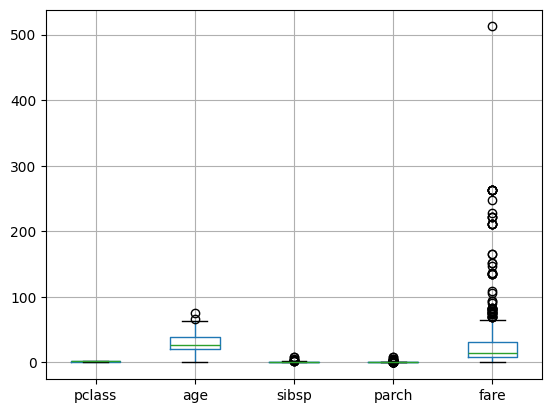

In [299]:
X_final.boxplot()

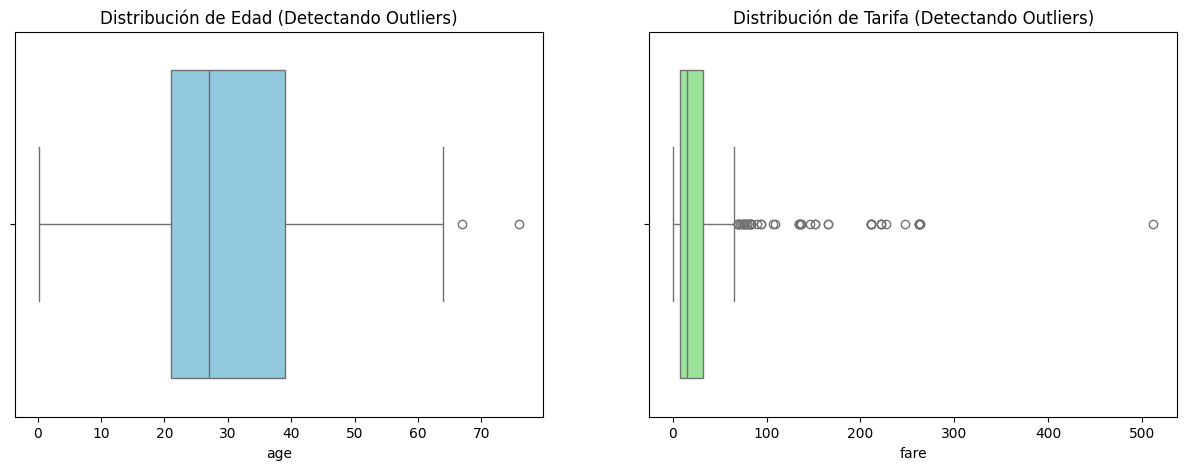

In [300]:
#Graficos de Cajas separado
fig, axes = plt.subplots(1, 2, figsize=(15,5))

#1. Boxplot de edad
sns.boxplot(x=X_final['age'], ax=axes[0], color='skyblue')
axes[0].set_title('Distribución de Edad (Detectando Outliers)')

#2. Boxplot de Tarifa
sns.boxplot(x=X_final['fare'], ax=axes[1], color='lightgreen')
axes[1].set_title('Distribución de Tarifa (Detectando Outliers)')

plt.show()

**Detección de datos perdidos**

In [301]:
X_final.count()

pclass      418
name        418
sex         418
age         332
sibsp       418
parch       418
ticket      418
fare        417
cabin        91
embarked    418
dtype: int64

In [297]:
print(X_final.isnull().sum())

pclass        0
name          0
sex           0
age          86
sibsp         0
parch         0
ticket        0
fare          1
cabin       327
embarked      0
dtype: int64


<Axes: >

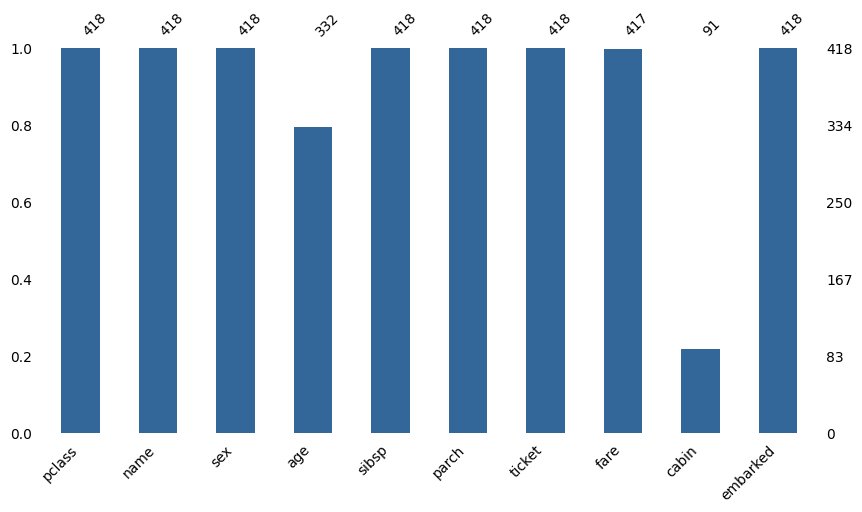

In [302]:
msno.bar(X_final, color=(0.2, 0.4, 0.6, 1), figsize=(10, 5), fontsize=10)

## Depuración de los datos

**Fase 1: Eliminación de variables**

In [303]:
#Columnas actuales
print(f"Columnas antes de borrar: {X_final.shape[1]}")

Columnas antes de borrar: 10


In [304]:
#Columnas a borrar 
print(columnas_a_eliminar)

['cabin', 'name', 'ticket']


In [305]:
#Eliminar columnas
X_final = X_final.drop(columnas_a_eliminar, axis=1)

In [306]:
#Visuallizar columnas
print(list(X_final.columns))

['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']


In [307]:
print(f"Columnas despuess de borrar: {X_final.shape[1]}")

Columnas despuess de borrar: 7


**Fase 2: tratamiento de valores atípicos:**  
No se borraran filas ya que se espera que el modelo pueda predecirlos.

**Fase 3: Tratamiento de valores perdidos**

Imputacion KNN

In [308]:
#variable usada anteriormente
print(cols_numericas)

['pclass', 'sibsp', 'parch', 'fare', 'age']


In [ ]:
#Imputamos valores con knn (la variable imputer ya estaba configurada)
matriz_final_imputada = imputer.transform(X_final[cols_numericas])

In [310]:
#Asignamos valores imputados
X_final['age'] = matriz_final_imputada[:, 4] #edad
X_final['fare'] = matriz_final_imputada[:, 3] #tarifa

In [311]:
#Visualización de nulos
print(X_final.isnull().sum())

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64


<Axes: >

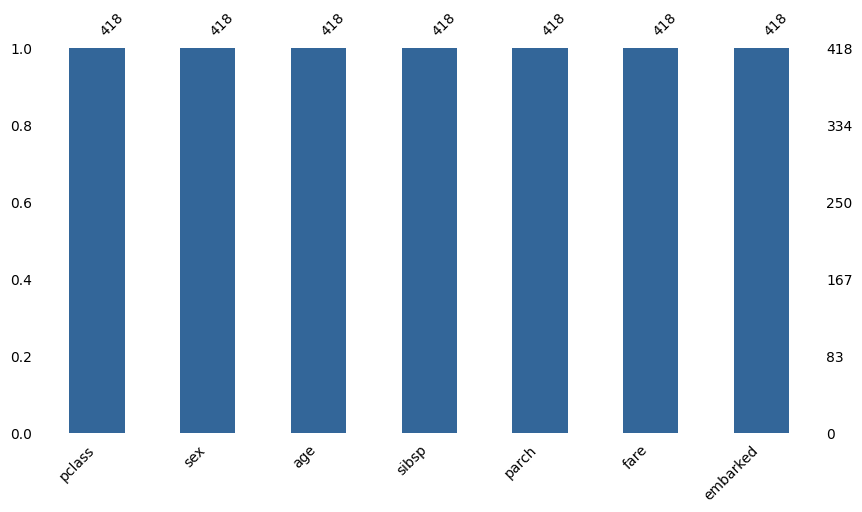

In [312]:
msno.bar(X_final, color=(0.2, 0.4, 0.6, 1), figsize=(10, 5), fontsize=10)

## Transformación de los datos

**Tranformación de variables categoricas usando One-hot encoding**

In [313]:
#Columnas usadas anteriormente
print(cols_a_codificar)

['sex', 'embarked']


In [314]:
#Transformación
X_final = pd.get_dummies(X_final,columns=cols_a_codificar, drop_first=True, dtype=int)

In [316]:
display(X_final.head())

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [317]:
#Revisar si faltan columnas
missing_cols = set(X_train.columns) - set(X_final.columns)
print(missing_cols)

set()


**Normalizar datos**

In [318]:
#Normalizamos datos
X_final_norm = scaler.transform(X_final)
#Reconstruimos df
X_final = pd.DataFrame(X_final_norm, columns=X_final.columns)

In [319]:
display(X_final.head())

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,1.0,0.426446,0.000,0.000000,0.029840,1.0,1.0,0.0
1,1.0,0.584016,0.125,0.000000,0.026679,0.0,0.0,1.0
2,0.5,0.773100,0.000,0.000000,0.036922,1.0,1.0,0.0
3,1.0,0.331905,0.000,0.000000,0.033016,1.0,0.0,1.0
4,1.0,0.268877,0.125,0.166667,0.046832,0.0,0.0,1.0


## Selección de características

Realizar la misma selección de características que se realice en el conjunto de entrenamiento, para que el modelo pueda interpretar los datos tal y como los aprenda.

In [321]:
#Columnas seleccionadas anteriormente
print(list(cols_seleccionadas))

['pclass', 'age', 'fare', 'sex_male', 'embarked_S']


In [ ]:
#Conjunto con columnas seleccionadas
X_final = X_final[cols_seleccionadas]

In [323]:
#Validamos
print(f"Columnas después de selección: {X_final.shape[1]}")
display(X_final.head(3))

Columnas después de selección: 5


,pclass,age,fare,sex_male,embarked_S
0,1.0,0.426446,0.029840,1.0,0.0
1,1.0,0.584016,0.026679,0.0,1.0
2,0.5,0.773100,0.036922,1.0,0.0


# **APRENDIZAJE NO SUPERVISADO**

## **Asociación**

Aplicar el algoritmo A priori a este conjunto de datos para buscar reglas de asociación sobre los pasajeros del Titanic.

Estudie el cuaderno de clase para realizar esta tarea.

### Preparación de los datos.

In [324]:
#Preparación de los datos (usaremos la bd imputada por knn no la final normalizada)
df_rules = X_train_knn.copy()


In [326]:
#agregaremos la columna de salida survived
df_rules['Target'] = Y_train.map({0: 'Muere', 1: 'Sobrevive'})

In [327]:
display(df_rules.head())

,pclass,sex,age,sibsp,parch,fare,embarked,Target
69,3,male,26.0,2,0,8.6625,S,Muere
85,3,female,33.0,3,0,15.8500,S,Sobrevive
794,3,male,25.0,0,0,7.8958,S,Muere
161,2,female,40.0,0,0,15.7500,S,Sobrevive
815,1,male,38.2,0,0,0.0000,S,Muere


In [328]:
#Convertimos las variables numericas a categoricaas
#Grupo de edades
bins_edad = [0, 12, 18, 60, 100]
labels_edad = ['Niño', 'Adolescente', 'Adulto', 'Anciano']
df_rules['Rango_Edad'] = pd.cut(df_rules['age'], bins=bins_edad, labels=labels_edad)


In [331]:
df_rules['Rango_Edad'].value_counts()

Rango_Edad
Adulto         440
Adolescente     46
Niño            39
Anciano         11
Name: count, dtype: int64

In [332]:
#grupo Tarifa
df_rules['Rango_Tarifa'] = pd.qcut(df_rules['fare'], q=4, labels=['Tarifa_Baja', 'Tarifa_Media', 'Tarifa_Alta', 'Tarifa_MuyAlta'])

In [333]:
df_rules['Rango_Tarifa'].value_counts()

Rango_Tarifa
Tarifa_Alta       140
Tarifa_Media      136
Tarifa_Baja       134
Tarifa_MuyAlta    126
Name: count, dtype: int64

In [336]:
#Grupo Clase
#aqui voy a usar .astype para volver el campo a texto y le pegare la palabra clase_

df_rules['Clase'] = 'Clase_' +df_rules['pclass'].astype(str)

In [338]:
#Grupo Sex lo convertire para dejar en español todo el df
mapa_sexo = {'female': 'Mujer', 'male': 'Hombre'}
df_rules['Sexo'] = df_rules['sex'].map(mapa_sexo)

In [339]:
display(df_rules.head())

,pclass,sex,age,sibsp,parch,fare,embarked,Target,Rango_Edad,Rango_Tarifa,Clase,Sexo
69,3,male,26.0,2,0,8.6625,S,Muere,Adulto,Tarifa_Media,Clase_3,Hombre
85,3,female,33.0,3,0,15.8500,S,Sobrevive,Adulto,Tarifa_Alta,Clase_3,Mujer
794,3,male,25.0,0,0,7.8958,S,Muere,Adulto,Tarifa_Media,Clase_3,Hombre
161,2,female,40.0,0,0,15.7500,S,Sobrevive,Adulto,Tarifa_Alta,Clase_2,Mujer
815,1,male,38.2,0,0,0.0000,S,Muere,Adulto,Tarifa_Baja,Clase_1,Hombre


In [340]:
#Seleccion final de columnas a usar
cols_para_apriori = ['Target', 'Rango_Edad', 'Rango_Tarifa', 'Clase', 'Sexo']

In [341]:
#Creamos Df final
df_texto_final = df_rules[cols_para_apriori].astype(str)

In [342]:
display(df_texto_final.head())

,Target,Rango_Edad,Rango_Tarifa,Clase,Sexo
69,Muere,Adulto,Tarifa_Media,Clase_3,Hombre
85,Sobrevive,Adulto,Tarifa_Alta,Clase_3,Mujer
794,Muere,Adulto,Tarifa_Media,Clase_3,Hombre
161,Sobrevive,Adulto,Tarifa_Alta,Clase_2,Mujer
815,Muere,Adulto,Tarifa_Baja,Clase_1,Hombre


**Apyori no lee df, lee listas de listas, por lo cual voy a convertir cada fila de la tabla en una lista.**

In [343]:
transacciones = []
for i in range(len(df_texto_final)):
    #Tomamos la fila "i" y la convierto en una lista simple
    fila_lista = df_texto_final.iloc[i].tolist()
    transacciones.append(fila_lista)


In [344]:
print(f"Cantidad de transacciones: {len(transacciones)}")

Cantidad de transacciones: 536


In [350]:
#Imprimimos la primera lista para validar
print(transacciones[0])

['Muere', 'Adulto', 'Tarifa_Media', 'Clase_3', 'Hombre']


### Ejecución de algoritmo Apyori

Usare los siguientes ajustes

min_support =0.1 -> La regla debe aparecer en al menos el 10% de los datos.  
min_confidence =0.5 ->La regla debe cumplirse almenos en el 50% de las veces.

In [373]:
#ajustes
reglas = apriori(transacciones, min_support=0.1, min_confidence=0.5, min_lift=1.1)
resultados = list(reglas)

print(f"✅ Se encontraron {len(resultados)} reglas.")

✅ Se encontraron 47 reglas.


### Ordenar resultados

In [374]:
#Convertir los resultados de las reglas en un df organizado y legible

lista_reglas = []

for resultado in resultados:
    support = resultado.support
    for ordered_stat in resultado.ordered_statistics:
        lista_reglas.append({
            'Si pasa esto (Antecedente)': ', '.join(ordered_stat.items_base),
            'Entonces pasa esto (Consecuente)': ', '.join(ordered_stat.items_add),
            'Confianza': ordered_stat.confidence,
            'Lift': ordered_stat.lift,
            'Soporte': support
            
        })

df_resultados = pd.DataFrame(lista_reglas)

In [375]:
#Reglas Creadas
display(df_resultados.head())

,Si pasa esto (Antecedente),Entonces pasa esto (Consecuente),Confianza,Lift,Soporte
0,Clase_1,Adulto,0.935065,1.139079,0.134328
1,Clase_1,Hombre,0.792208,1.153868,0.113806
2,Clase_1,Tarifa_MuyAlta,0.883117,3.756751,0.126866
3,Tarifa_MuyAlta,Clase_1,0.539683,3.756751,0.126866
4,Clase_2,Tarifa_Alta,0.574803,2.200675,0.136194


In [376]:
#Ordenamos por confianza de mayor a menor
df_resultados = df_resultados.sort_values(by='Confianza', ascending=False )

In [377]:
#Reglas Creadas ordenadas
display(df_resultados.head())

,Si pasa esto (Antecedente),Entonces pasa esto (Consecuente),Confianza,Lift,Soporte
111,"Tarifa_Media, Muere, Clase_3",Adulto,0.941860,1.147357,0.151119
25,"Tarifa_MuyAlta, Clase_1",Adulto,0.941176,1.146524,0.119403
54,"Muere, Clase_2",Hombre,0.937500,1.365489,0.111940
0,Clase_1,Adulto,0.935065,1.139079,0.134328
121,"Adulto, Muere, Tarifa_Baja",Hombre,0.934783,1.361531,0.160448


In [378]:
#Filtramos reglas que tienen la caracteristica de sobrevive

df_filtrado = df_resultados[df_resultados['Entonces pasa esto (Consecuente)'].str.contains('Sobrevive|Muere')]

In [381]:
#Filtramos reglas que tienen la caracteristica de sobrevive

df_filtrado_muere = df_resultados[df_resultados['Entonces pasa esto (Consecuente)'].str.contains('Muere')]
df_filtrado_sobrevive = df_resultados[df_resultados['Entonces pasa esto (Consecuente)'].str.contains('Sobrevive')]

### Resultados y análisis

In [385]:
#data frame con las primeras 10 reglas con valor de confianza mas alta
display(df_filtrado_muere.head(10))

,Si pasa esto (Antecedente),Entonces pasa esto (Consecuente),Confianza,Lift,Soporte
73,"Hombre, Tarifa_Baja",Muere,0.932692,1.384828,0.180970
132,"Hombre, Tarifa_Baja, Clase_3",Muere,0.926316,1.375361,0.164179
120,"Adulto, Hombre, Tarifa_Baja",Muere,0.924731,1.373008,0.160448
114,"Adulto, Hombre, Tarifa_Alta",Muere,0.919355,1.365025,0.106343
153,"Adulto, Hombre, Tarifa_Baja, Clase_3",Muere,0.916667,1.361034,0.143657
85,"Adulto, Hombre, Clase_3",Muere,0.892308,1.324867,0.324627
126,"Adulto, Tarifa_Media, Hombre",Muere,0.891304,1.323377,0.152985
167,"Adulto, Tarifa_Media, Hombre, Clase_3",Muere,0.887500,1.317729,0.132463
57,"Hombre, Clase_3",Muere,0.877119,1.302315,0.386194
71,"Hombre, Tarifa_Alta",Muere,0.864865,1.284121,0.119403


**Análisis de las reglas que incluye el resultado de no sobrevive (Muere):**  

La primera regla nos indica que si es Hombre y pago tarifa baja -> Muere. esta regla se fundamenta en una confianza de 0.93 lo cual quiere decir que 93 de cada 100 hombres que pagaron tarifa baja, no sobrevive. Esto tambien se puede analizar con el valor obtenido en el Soporte, el cual es de 0.18 lo cual quiere decir que esta regla se cumplio en el 18% de los pasajeros (hay que recordar que este analisis es del DF de X_Train el 70% de la población).  

La muerte en el Titanic no fue aleatoria. Fue sistemica para los hombres de bajos recursos. La combinación de Género (últimos en subir a los botes) + Clase Social (camarotes en el fondo del barco, dificultad para llegar a cubierta).

In [386]:
#data frame con las primeras 10 reglas con valor de confianza mas alta
display(df_filtrado_sobrevive.head(10))

,Si pasa esto (Antecedente),Entonces pasa esto (Consecuente),Confianza,Lift,Soporte
51,"Adulto, Mujer",Sobrevive,0.694656,2.127634,0.169776
16,Mujer,Sobrevive,0.678571,2.078367,0.212687
49,Mujer,"Adulto, Sobrevive",0.541667,2.103865,0.169776


**Análisis de la regla que incluye resultado de Sobrevive.**  

la primera regla nos indica que si es adulto y es mujer -> Sobrevive. Está rela esta fundamentada por un confianza del 0.69 lo cual quiere decir que 69 mujeres de cada 100 que erán adultas, lograron sobrevivir. El valor obtenido en soporte es de 0.169 casi un 17%, lo cual quiere decir que esta regla se cumplio en el 18% de la población. El Lift de 2.12 significa que por ser una mujer adulta, duplicaba tus probabilidades de sobrevivir respecto al promedio general.  

La supervivencia estuvo determinada principalmente por el género (política de "Mujeres y niños primero"). Sin embargo, el hecho de que la confianza sea del 69% (y no del 90%) sugiere que hubo otros factores (probablemente la clase social) que impidieron que todas las mujeres se salvaran.

### Conclusión de algoritmo de asociación.

Mediante la aplicación del algoritmo Apriori (Aprendizaje No Supervisado), logre extraer patrones de comportamiento ocultos en el conjunto de datos del Titanic sin necesidad de entrenar un modelo predictivo. El análisis reveló dos narrativas opuestas definidas por la interacción entre Género y Estatus Socioeconómico (Tarifa/Clase).  

El patrón de muerte: Con Confianza del 93% y un soporte de 18% de la población.  
El patrón de Supervivencia:  Con confianza de 69%, una fuerte influencia (Lift) > 2 y un soporte del 17% de la población.  

El algoritmo de Asociación demuestra ser eficaz para describir "qué pasó" en el titanic. Nos permite confirmar que la tragedia tuvo un sesgo estructural severo entre el genero y la clase social de los pasajeros.  

Es importante resaltar que con este algoritmo tambien se puede análizar de manera mas profunda otras reglas que quizas tienen menor nivel de confianza y menor soporte en la población.

## **Clustering**

Una vez realizado el preprocesamiento, se pueden utilizar los datos para realizar un agrupamiento. Se utilizará, en este caso, la técnica de aprendizaje no supervisado K-Means. 

Se separarán los datos, por un lado el conjunto de variables independientes y, por otro lado, la variable dependiente.

### Carga de Librerias

In [387]:
#Librerias usadas (igualmente ya estan importadas al inciio del cuaderno)
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Entrenamiento del modelo

In [388]:
#Iniciamos Clustering K-Means (k=2)
#creamos df con los ya limpios

X_train_Kmeans = X_train
Y_train_Kmeans = Y_train

In [389]:
#construir el modelo k-means
#n_clusters=2 (Dividir conjunto en 2 grupos: sobrevive y no sobrevive)
#random_state=1 (semilla que usaremos)

K_means = KMeans(n_clusters=2, random_state=1, n_init=10)

In [390]:
#entrenamos el modelo

K_means.fit(X_train_Kmeans)

,n_clusters,2
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,1
,copy_x,True
,algorithm,'lloyd'


In [391]:
#predecir sobre el conjunto de X_train
y_pred_cluster = K_means.predict(X_train_Kmeans)

### Análisis de datos de entrenamiento

In [393]:
#Crear Df comparativo
pred = pd.DataFrame({'Actual': Y_train_Kmeans, 'Prediccion_Cluster': y_pred_cluster})

In [394]:
#Visualizar
display(pred.head(10))

,Actual,Prediccion_Cluster
69,0,0
85,1,1
794,0,0
161,1,1
815,0,0
516,1,1
454,0,0
59,0,0
42,0,0
499,0,0


In [395]:
#Calculo de la precisión
acc = accuracy_score(Y_train_Kmeans, y_pred_cluster)
print(f"Precisión (Coincidencia): {acc: .4f}")

Precisión (Coincidencia):  0.7854


En el entrenamiento de los datos obtuvimos una Acurracy o precisión del 78.5% de los datos 

In [ ]:
f = plt.figure(figsize=(16,10))
plt.subplot(221)
sns.scatterplot(x="age", y="fare", data=X, hue=y)
plt.title('Original')

plt.subplot(222)
plt.title('Predicción')
sns.scatterplot(x="age", y="fare", data=X, hue=y_pred)

 Si es posible, explorar el modelo con distintos valores de los parámetros para determinar cuáles podrían ser los valores óptimos. Puede utilizar algún algoritmo o alguna función de python para ello.

In [ ]:
...

Predecir la salida del modelo sobre el conjunto de prueba

In [ ]:
# Aplicar el modelo sobre el conjunto test
y_predTst = modelo.predict(titanicRealTst)

# Conclusiones

Comentar todas las conclusiones que se puedan extraer de este estudio de Aprendizaje No Supervisado

...

# APRENDIZAJE SUPERVISADO

Observe que para los clasificadores hay una gran parte del código que se repite, puede usar funciones para evitar la repetición.

Aplicar alguna técnica de validación generando los subconjuntos correspondientes para construir los modelos.


## Clasificador bayesiano

In [ ]:
# Crea un objeto de tipo GaussianNB


# Realiza el entrenamiento usando el método fit
nbc.fit(X_train, y_train)

Predecir la salida:

Obtener el error cometido al clasificar:

Aplicar el modelo al conjunto test para clasificar esas nuevas observaciones y obtener los resultados.

## Clasificador Árboles de decisión

In [ ]:
# Crear la instancia de Árboles con los datos de entrenamiento



# Entrenar el clasificador

Predecir la salida:

Obtener el error cometido al clasificar:

Aplicar el modelo al conjunto test para clasificar esas nuevas observaciones y obtener los resultados.

## Clasificador $k$-NN

Obtener el mejor valor de $k$:

In [ ]:
# Crear objeto k-NN classifer


# Entrenar el clasificador k-NN

Predecir la salida:

Obtener el error cometido al clasificar:

Aplicar el modelo al conjunto test para clasificar esas nuevas observaciones y obtener los resultados.

## Clasificador Perceptrón Multicapa

In [ ]:
# Crear objeto MLP


# Entrenar el clasificador MLP y obtener los valores óptimos de los hiperparámetros

Predecir la salida:

Obtener el error cometido al clasificar:

Aplicar el modelo al conjunto test para clasificar esas nuevas observaciones y obtener los resultados.

# Autoencoder

In [1]:
# Crear objeto


# Obtener los valores óptimos de los hiperparámetros

Predecir la salida:

Obtener el error cometido al clasificar:

Aplicar el modelo al conjunto test para clasificar esas nuevas observaciones y obtener los resultados.

# Conclusiones

Incluir en este apartado las conclusiones que se pueden obtener a partir del análisis comparativo de los modelos de clasificación.


...